# Data Preprocessing
In our preprocessing step, we filter our data to first select only numerical features which we can use for regression. Then, we calculate each features correlation with the 'close' feature, which is what our model aims to predict. We only use features that have a correlation value of greater than 0.6, as we want to use a minimal set of important features to prevent overfitting. We handle missing data by filling it in with the column's median values as opposed to mean due to the presence of outliers in the data. Additionally, depending on the feature, we use standardization or min-max scaling.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df_original = pd.read_csv('infolimpioavanzadoTarget.csv')

In [38]:
# Data Filtering

numerical_features = df_original.select_dtypes(include=['float64', 'int64']).columns
close_correlation = df_original[numerical_features].corr()['close'].drop('close')
high_correlation_features = close_correlation[close_correlation.abs() > 0.6]
df = df_original[['date', 'ticker', 'close'] + high_correlation_features.index.tolist()]

# Converting Date
df['date'] = pd.to_datetime(df['date'])

<ipython-input-38-1ca09d48df36>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [39]:
# Handle missing data
median_imputer = SimpleImputer(strategy='median')
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = median_imputer.fit_transform(df[num_cols])

<ipython-input-39-25922a8ec760>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = median_imputer.fit_transform(df[num_cols])


In [40]:
# Feature Scaling
standard = ['open', 'vwapadjclosevolume', 'atr5', 'atr10', 'atr15', 'atr20']
min_max = ['open', 'high', 'low', 'low-5', 'high-5', 'low-10', 'high-10', 'low-15', 'high-15']

In [41]:
# Scale Data
stdScaler = StandardScaler()
minMaxScaler = MinMaxScaler()
df[standard] = stdScaler.fit_transform(df[standard])
df[min_max] = minMaxScaler.fit_transform(df[min_max])

<ipython-input-41-e1cfd55cecbe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[standard] = stdScaler.fit_transform(df[standard])
<ipython-input-41-e1cfd55cecbe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[min_max] = minMaxScaler.fit_transform(df[min_max])


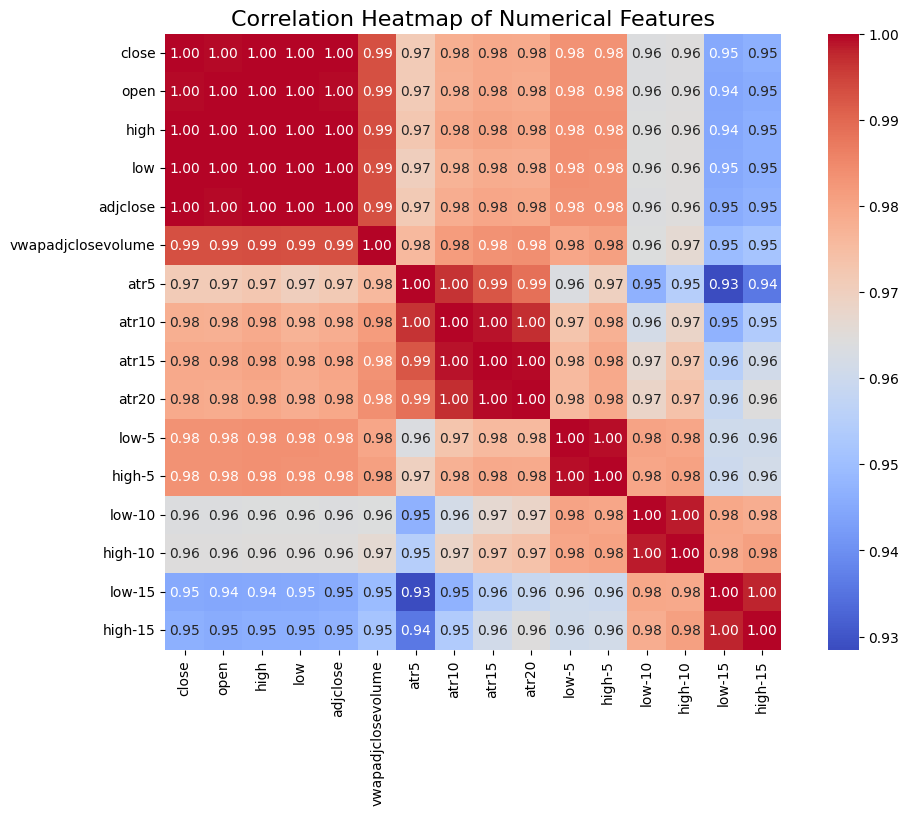

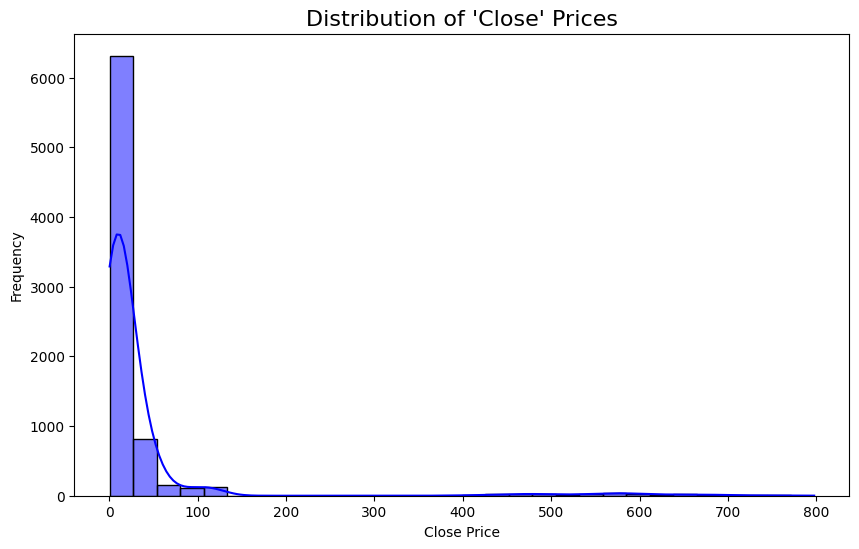

In [56]:
# Correlation Matrix
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

# Close Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['close'], bins=30, kde=True, color='blue')
plt.title("Distribution of 'Close' Prices", fontsize=16)
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()




# Polynomial Regression (Revisited)
In Milestone 3 we used polynomial regression, however, we did not sufficiently address hyperparameter tuning. We are reintroducing polynomial regression here to show how hyperparameter tuning, specifically changing the degree, impacts our model performance. Therefore, when we introduce new models here in milestone 4, we can more accurately compare the performance of polynomial regression and our new models.

We use polynomial regresision to make 'close' price predictions for each specific ticker symbol in our data set (each ticker correlates to a unique company in the stock market). We run our model on all tickers and display the overall results, but for ease of visualization, we provide graphs only showing results for just 3 tickers: ASML, ASTL, and ASRV. We use hyperparameter tuning here as we test our polynomial regression model for different degrees. We want to find which polynomial degree results in the lowest RMSE on our test data, while considering the risk of overfitting as we increase the polynomial degree.

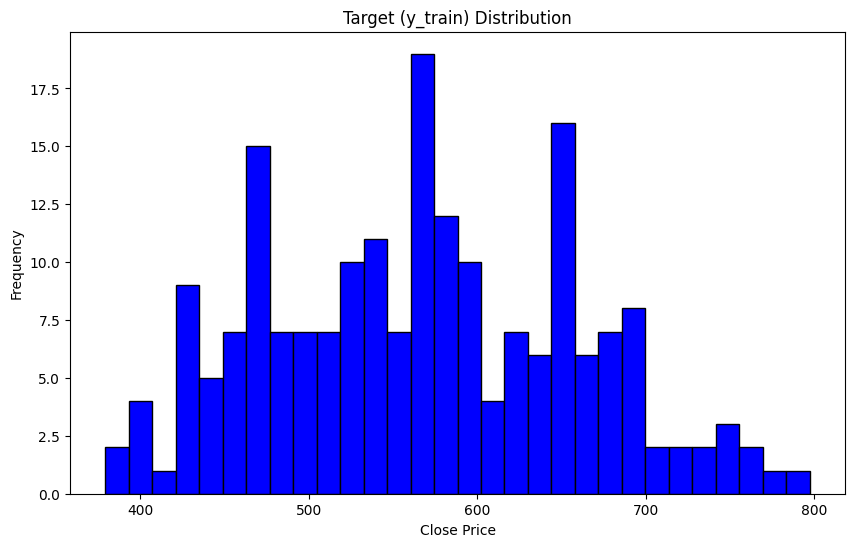

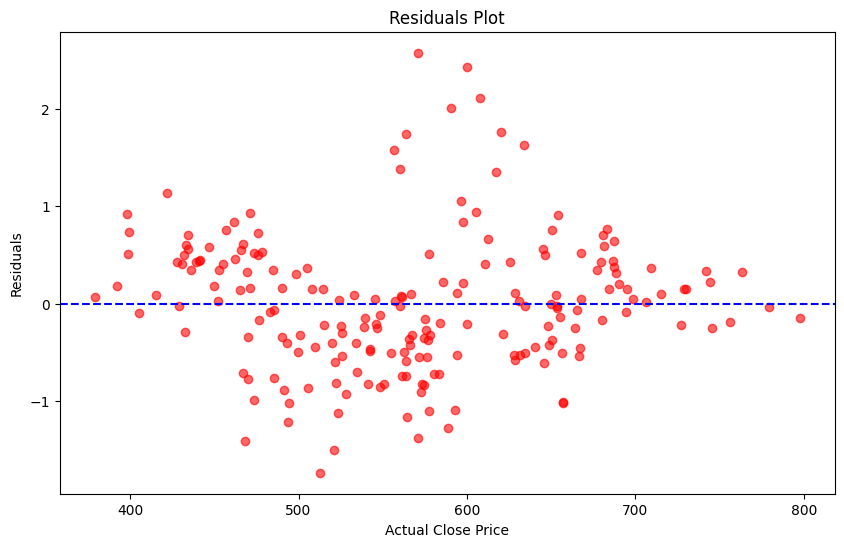

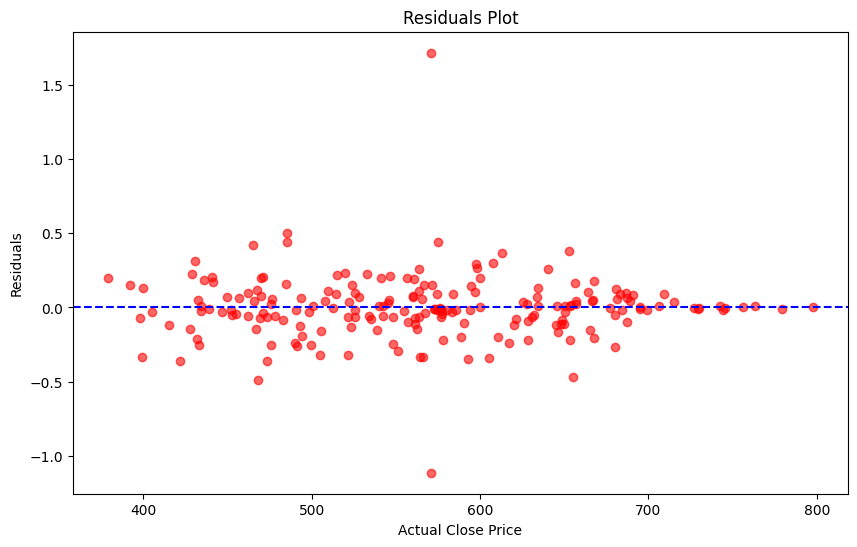

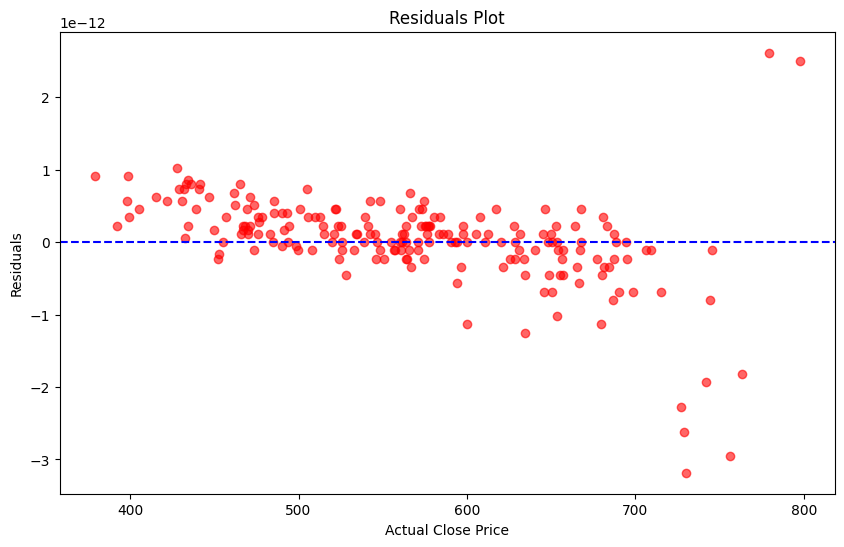

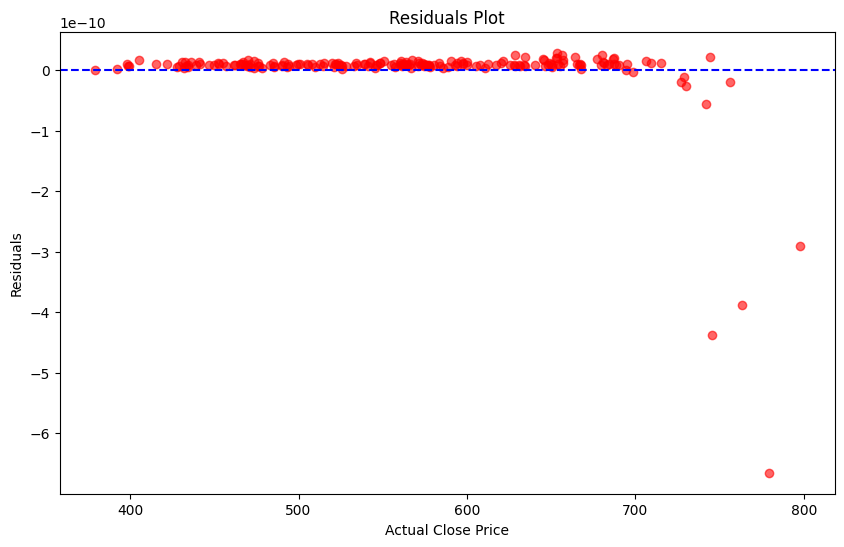

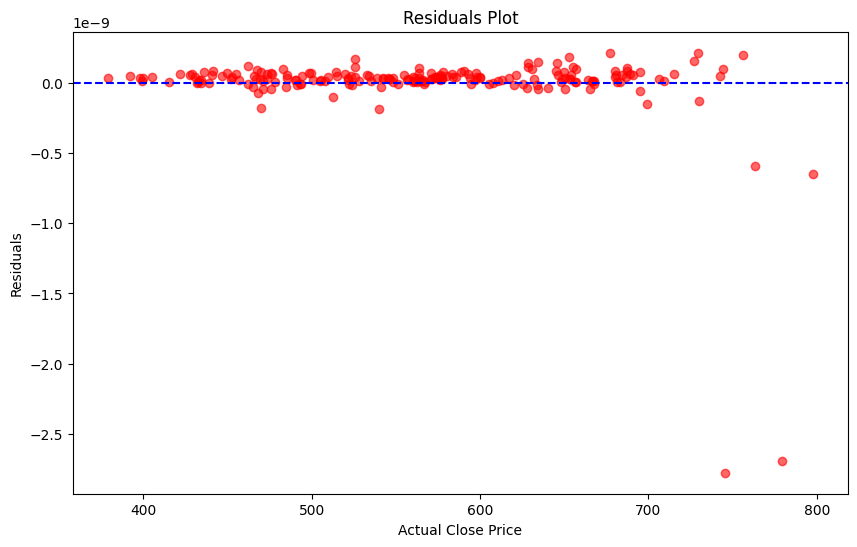

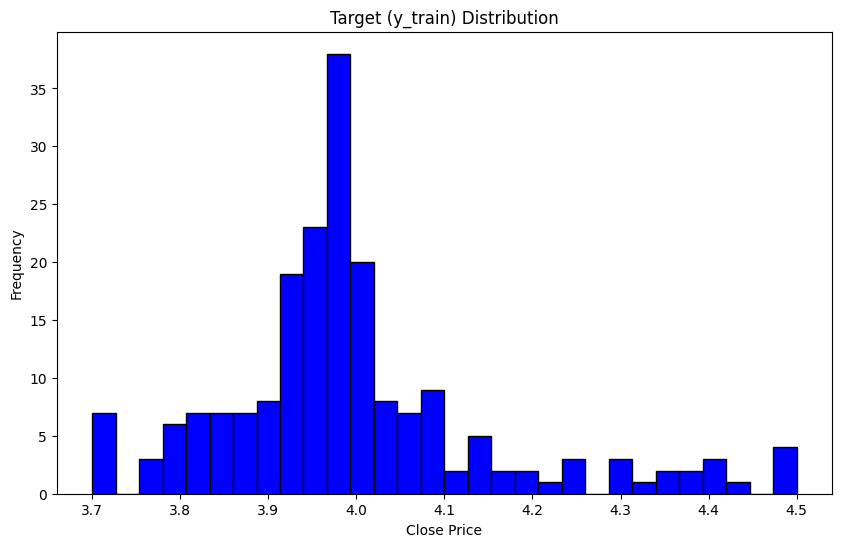

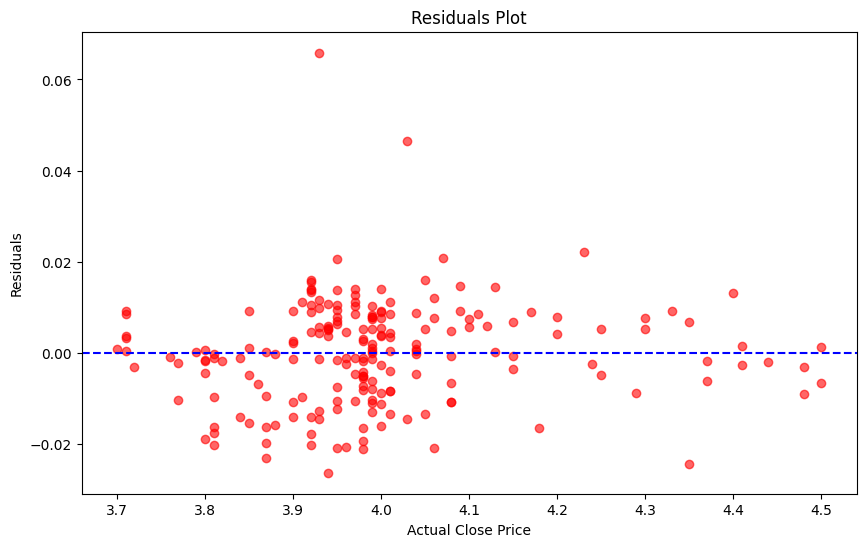

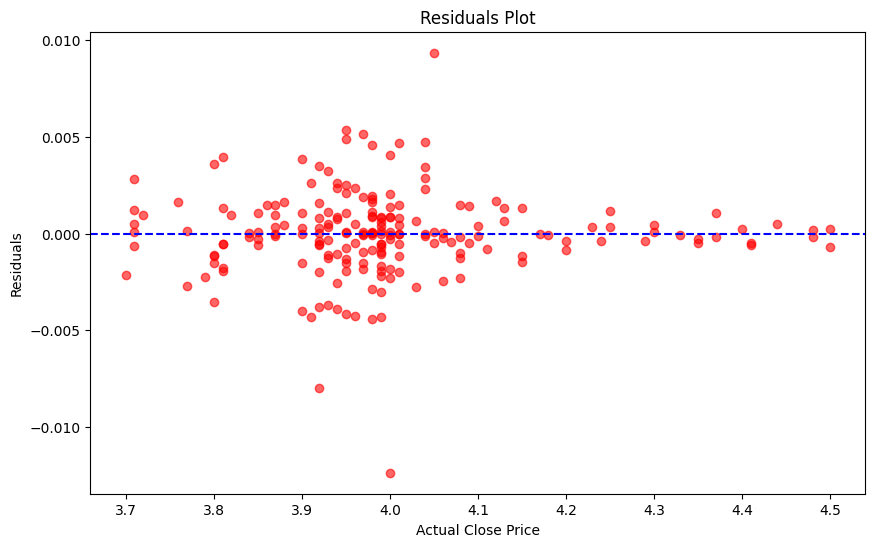

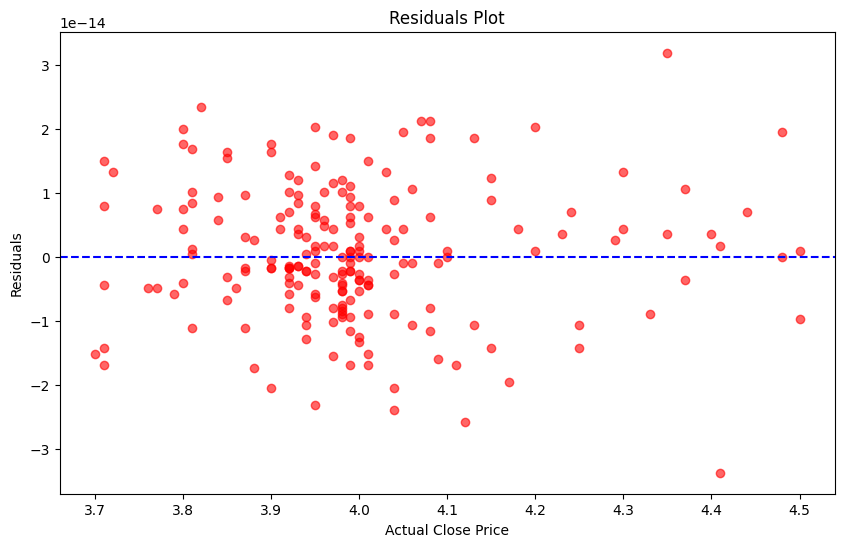

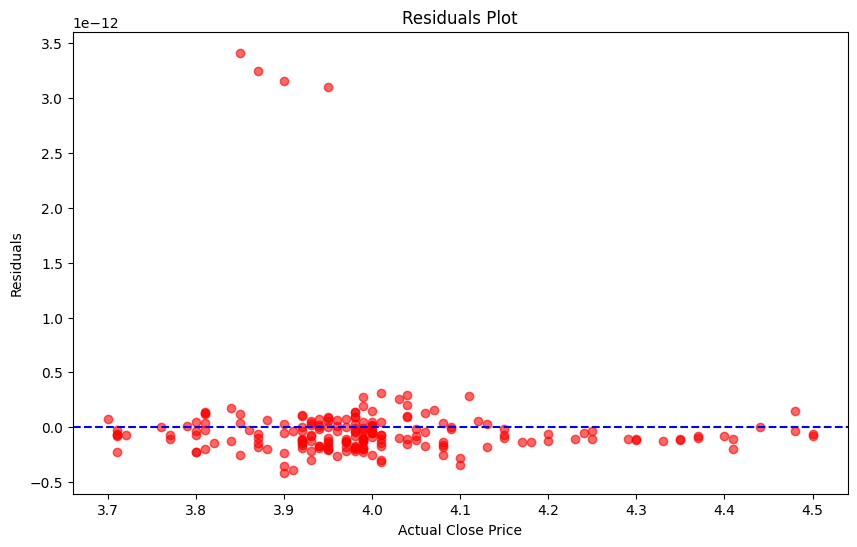

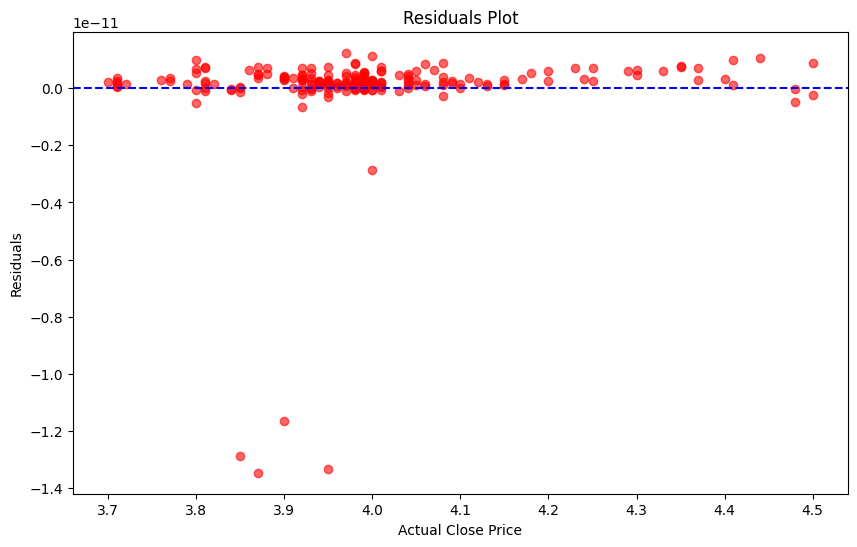

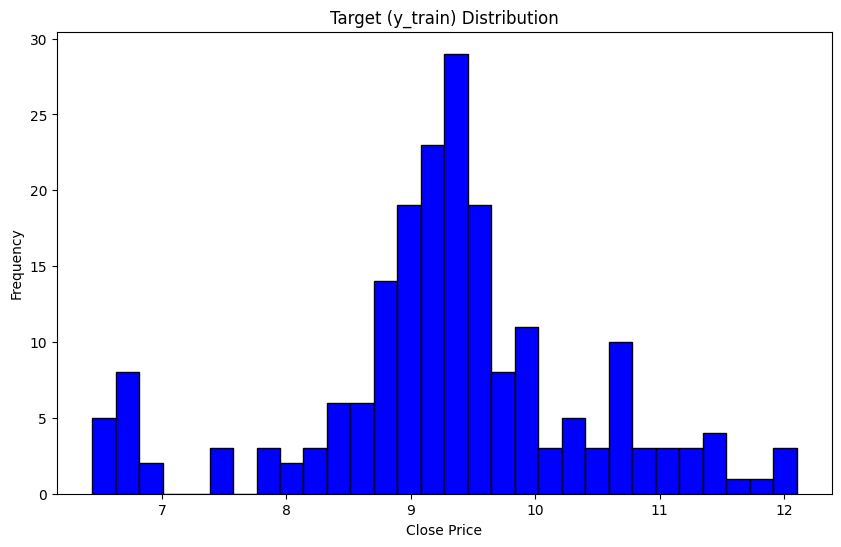

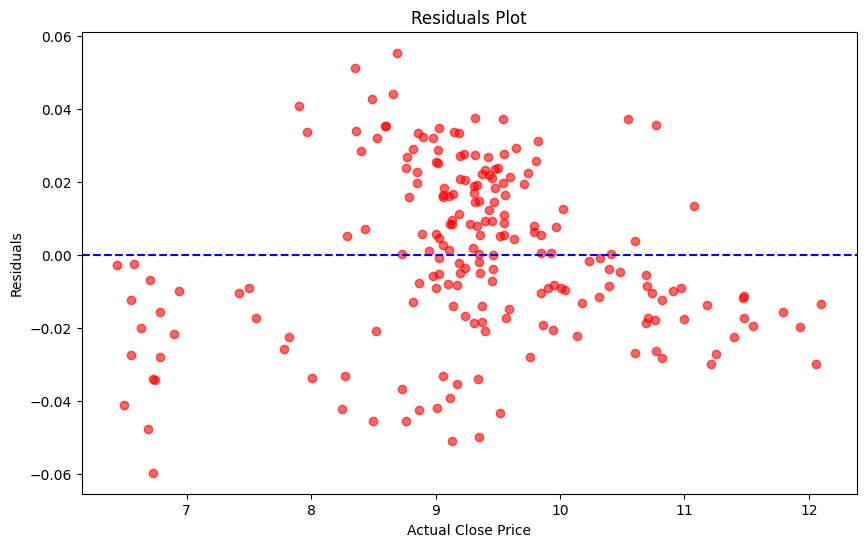

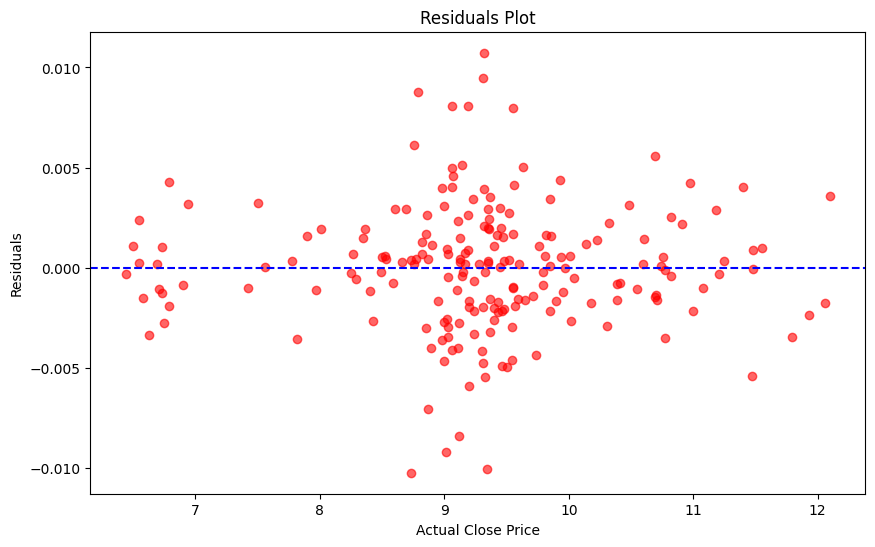

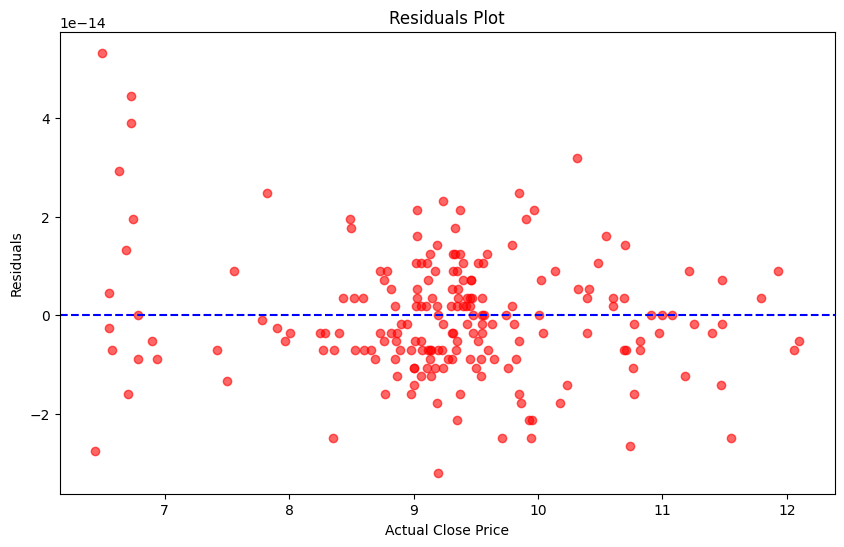

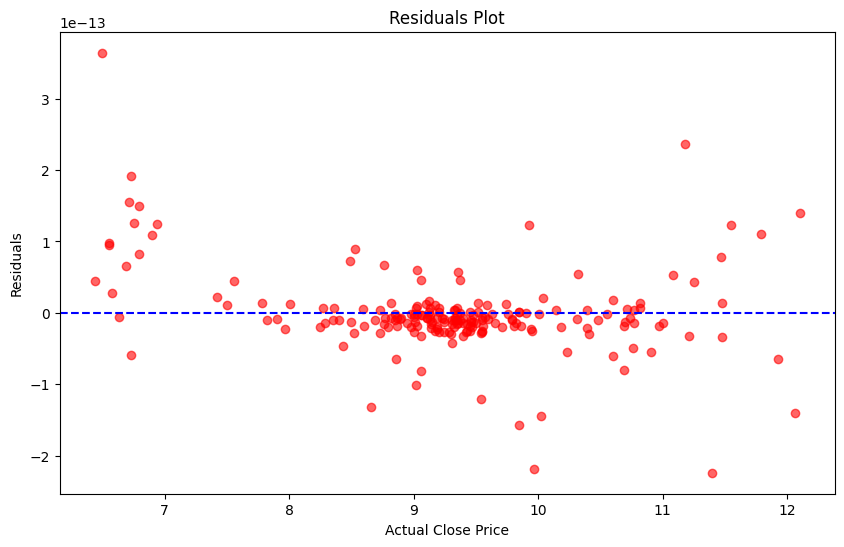

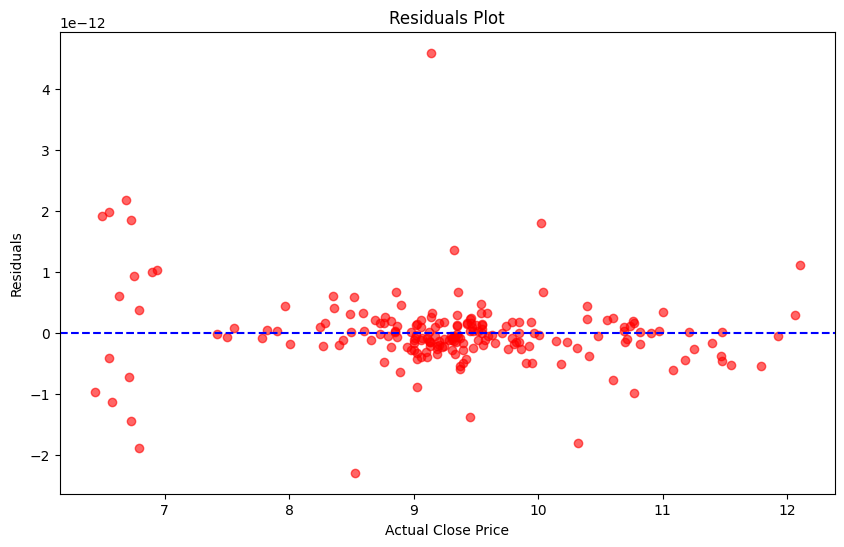

Evaluation Results for ASML:

Polynomial Degree 1:
  Train RMSE: 0.7020
  Test RMSE: 2.4659
  Train MAE: 0.5329
  Test MAE: 2.1579
  Train R2: 0.9999
  Test R2: 0.9982

Polynomial Degree 2:
  Train RMSE: 0.2202
  Test RMSE: 5.8476
  Train MAE: 0.1353
  Test MAE: 4.6275
  Train R2: 1.0000
  Test R2: 0.9897

Polynomial Degree 3:
  Train RMSE: 0.0000
  Test RMSE: 8.7226
  Train MAE: 0.0000
  Test MAE: 7.1002
  Train R2: 1.0000
  Test R2: 0.9771

Polynomial Degree 5:
  Train RMSE: 0.0000
  Test RMSE: 22.2704
  Train MAE: 0.0000
  Test MAE: 16.5030
  Train R2: 1.0000
  Test R2: 0.8508

Polynomial Degree 6:
  Train RMSE: 0.0000
  Test RMSE: 32.2541
  Train MAE: 0.0000
  Test MAE: 26.2627
  Train R2: 1.0000
  Test R2: 0.6871

--------------------------------------------------

Evaluation Results for ASRV:

Polynomial Degree 1:
  Train RMSE: 0.0116
  Test RMSE: 0.0537
  Train MAE: 0.0086
  Test MAE: 0.0514
  Train R2: 0.9946
  Test R2: 0.2158

Polynomial Degree 2:
  Train RMSE: 0.0022
  Test R

In [57]:
# HYPER PARAMETER TUNING FOR POLYNOMIAL REGRESSION(SPOILER: THE BEST MODEL IS OF DEGREE 1)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error, median_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

selected_tickers = ['ASML', 'ASRV', 'ASTL']
degrees = [1, 2, 3, 5, 6]
evaluation_results = {}
avgNum = {}

for degree in degrees:
    if degree not in avgNum:
        avgNum[degree] = {}
    avgNum[degree]['Train RMSE'] = 0
    avgNum[degree]['Test RMSE'] = 0
    avgNum[degree]['Train MAE'] = 0
    avgNum[degree]['Test MAE'] = 0
    avgNum[degree]['Train R2'] = 0
    avgNum[degree]['Test R2'] = 0

# Iterate over each ticker
for ticker in selected_tickers:
    ticker_df = df[df['ticker'] == ticker].copy()
    ticker_df = ticker_df.sort_values('date')
    ticker_df.reset_index(drop=True, inplace=True)

    X = ticker_df.drop(['close', 'date', 'ticker'], axis=1)
    y = ticker_df['close']

    split_index = int(len(X) * 0.8)
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    plt.figure(figsize=(10, 6))
    plt.hist(y_train, bins=30, color='blue', edgecolor='black')
    plt.title("Target (y_train) Distribution")
    plt.xlabel("Close Price")
    plt.ylabel("Frequency")
    plt.show()

    for degree in degrees:
        polynomial = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = polynomial.fit_transform(X_train_scaled)
        X_test_poly = polynomial.transform(X_test_scaled)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        train_max_err = max_error(y_train, y_train_pred)
        train_med_abs_err = median_absolute_error(y_train, y_train_pred)

        avgNum[degree]['Train RMSE'] += train_rmse
        avgNum[degree]['Test RMSE'] += test_rmse
        avgNum[degree]['Train MAE'] += train_mae
        avgNum[degree]['Test MAE'] += test_mae
        avgNum[degree]['Train R2'] += train_r2
        avgNum[degree]['Test R2'] += test_r2

        model_name = f'Polynomial Degree {degree}'
        if ticker not in evaluation_results:
            evaluation_results[ticker] = {}
        evaluation_results[ticker][model_name] = {
            "Train RMSE": train_rmse,
            "Test RMSE": test_rmse,
            "Train MAE": train_mae,
            "Test MAE": test_mae,
            "Train R2": train_r2,
            "Test R2": test_r2
        }

        X_dense = pd.DataFrame(
            {col: np.linspace(X_train[col].min(), X_train[col].max(), 500) for col in X_train.columns}
        )
        X_dense_scaled = scaler.transform(X_dense)
        X_dense_poly = polynomial.transform(X_dense_scaled)
        y_dense_pred = model.predict(X_dense_poly)

        dense_date_range = np.linspace(
            ticker_df['date'].iloc[0].toordinal(),
            ticker_df['date'].iloc[-1].toordinal(),
            500
        )
        dense_date_range = [pd.Timestamp.fromordinal(int(date)) for date in dense_date_range]


        residuals = y_train - y_train_pred
        plt.figure(figsize=(10, 6))
        plt.scatter(y_train, residuals, color='red', alpha=0.6)
        plt.axhline(0, color='blue', linestyle='--')
        plt.title("Residuals Plot")
        plt.xlabel("Actual Close Price")
        plt.ylabel("Residuals")
        plt.show()

# Calculate averages
for degree in avgNum:
    avgNum[degree]['Train RMSE'] /= len(selected_tickers)
    avgNum[degree]['Test RMSE'] /= len(selected_tickers)
    avgNum[degree]['Train MAE'] /= len(selected_tickers)
    avgNum[degree]['Test MAE'] /= len(selected_tickers)
    avgNum[degree]['Train R2'] /= len(selected_tickers)
    avgNum[degree]['Test R2'] /= len(selected_tickers)


for ticker in evaluation_results:
    print(f"Evaluation Results for {ticker}:")
    for model_name, metrics in evaluation_results[ticker].items():
        print(f"\n{model_name}:")
        for metric_name, value in metrics.items():
            print(f"  {metric_name}: {value:.4f}")
    print("\n" + "-"*50 + "\n")

print(f"Average Evaluation Results for all tickers:")
for degree in avgNum:
    print(f"\n{degree}:")
    for metric_name, value in avgNum[degree].items():
        print(f"  {metric_name}: {value:.4f}")


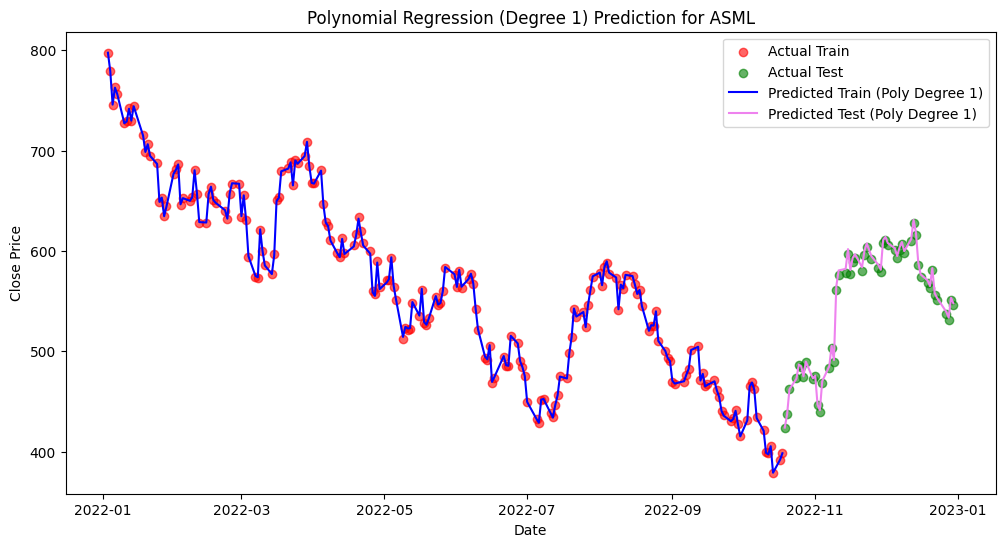

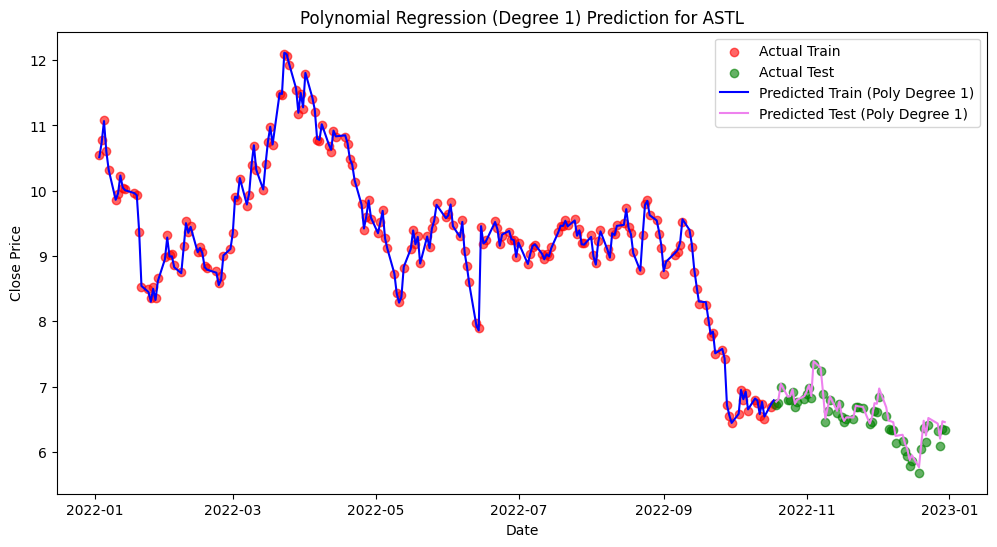

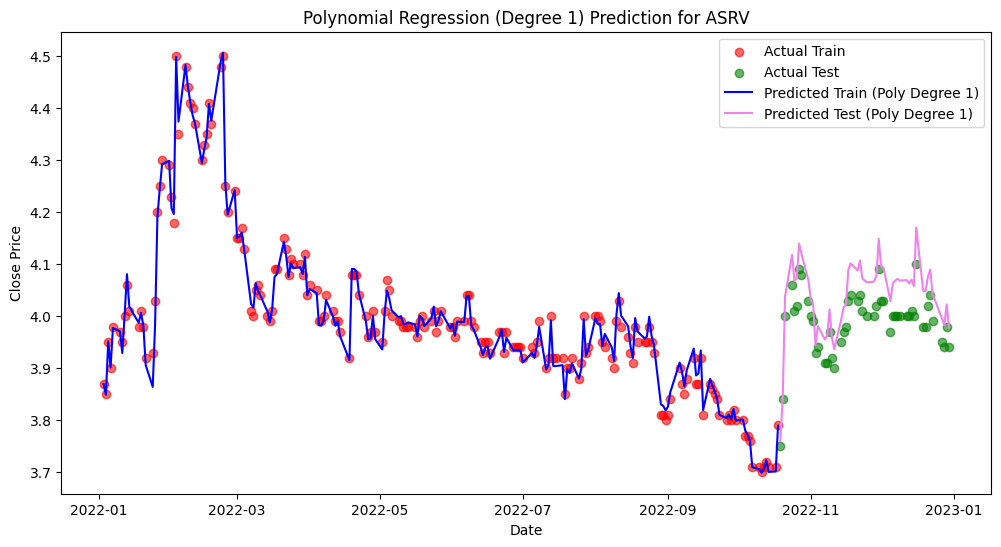

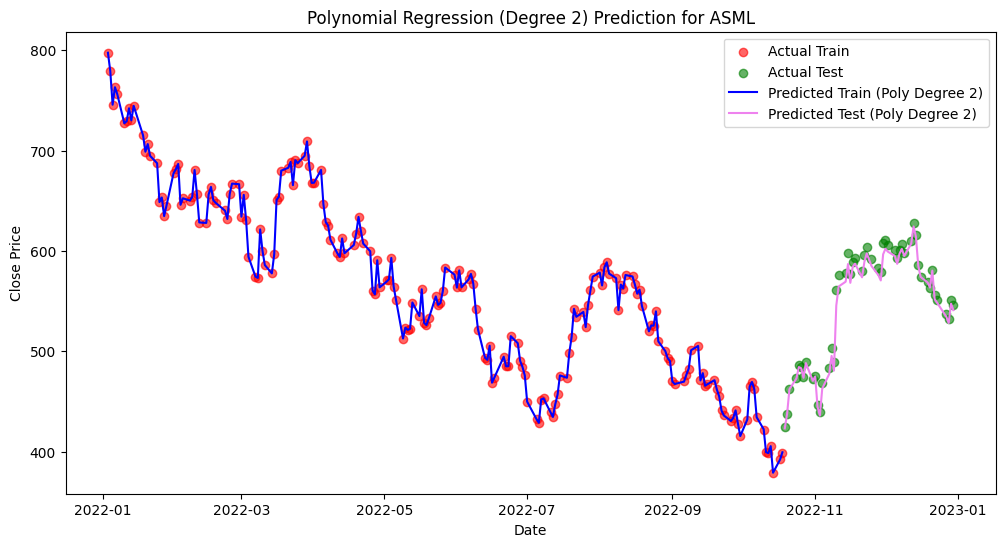

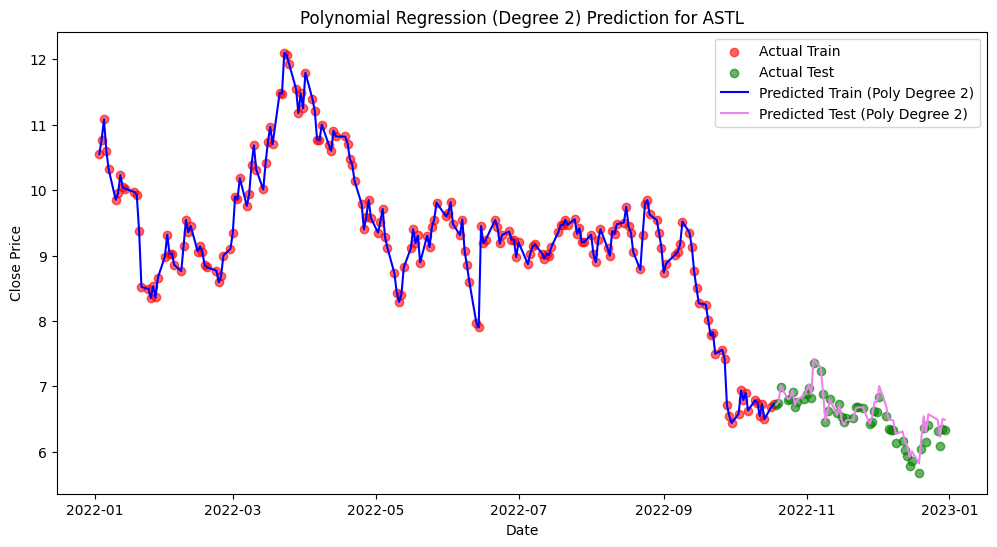

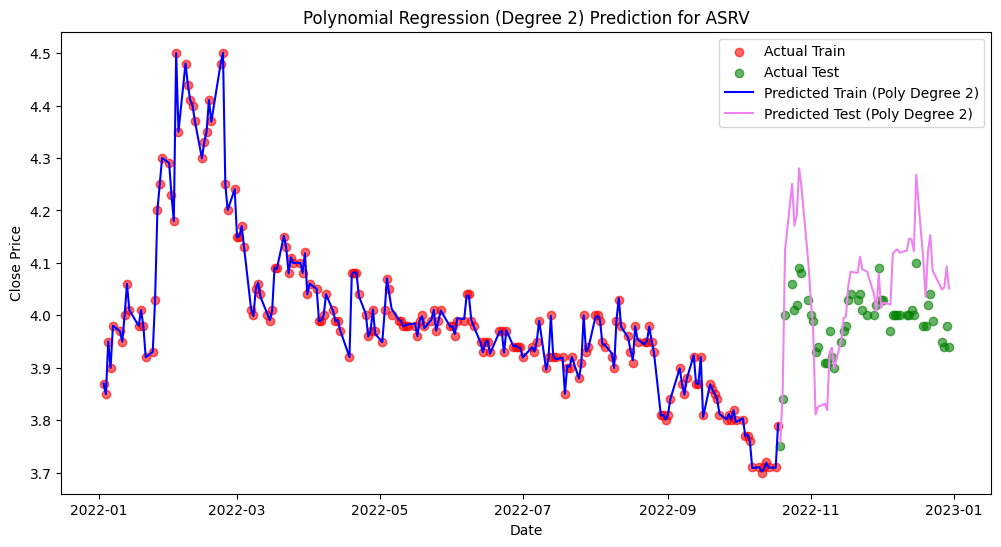

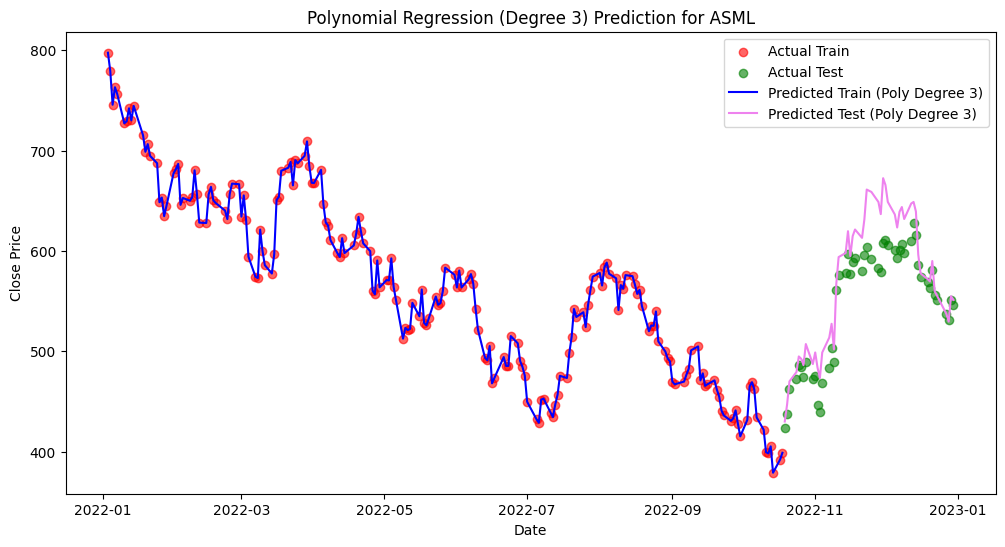

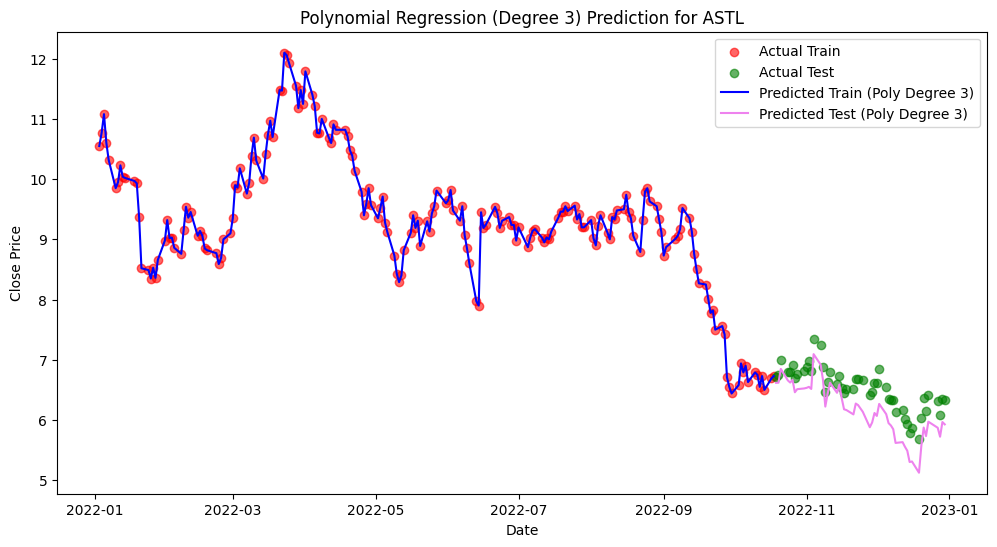

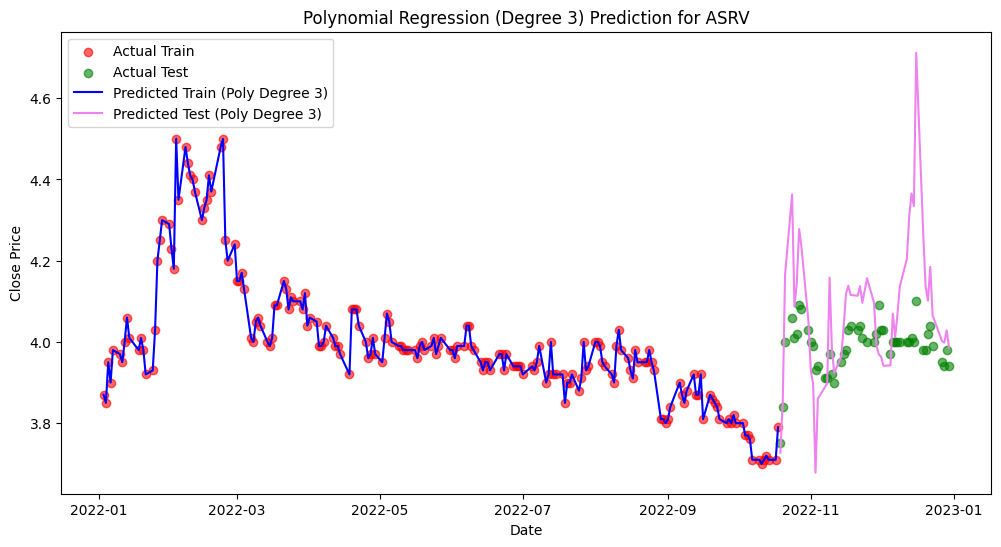

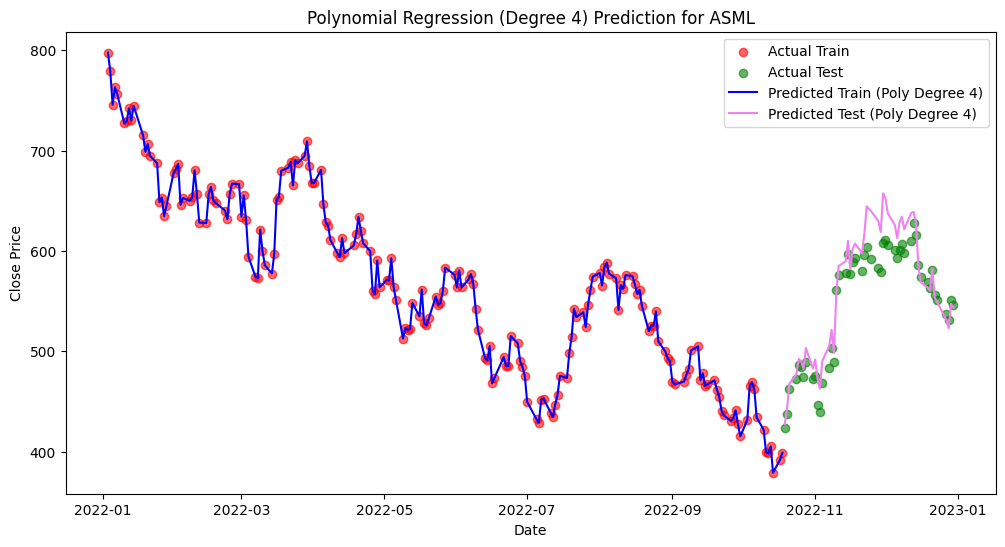

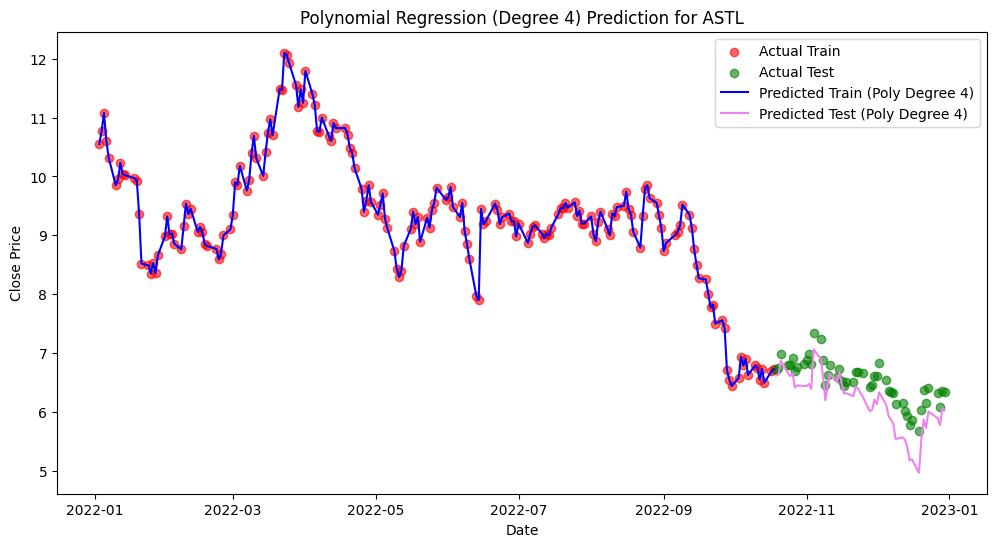

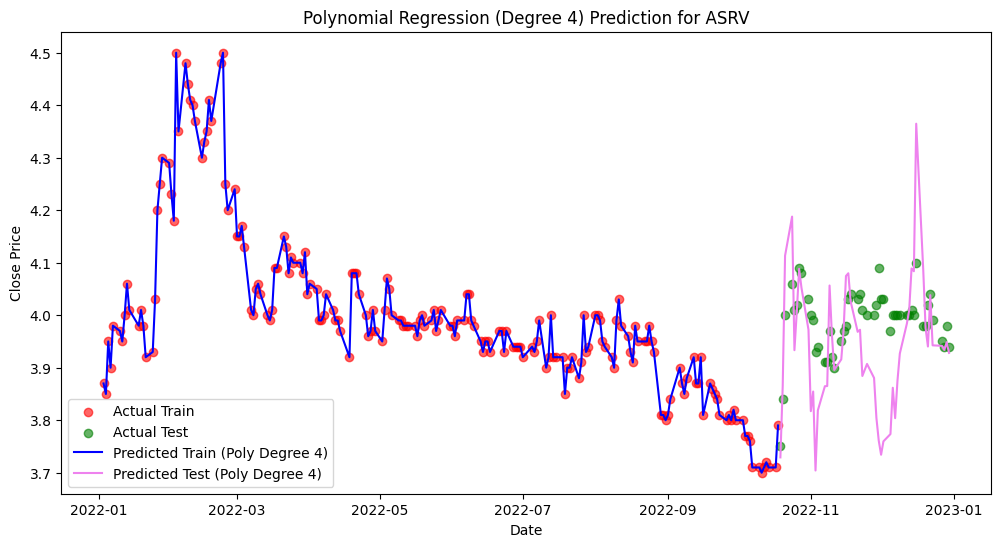

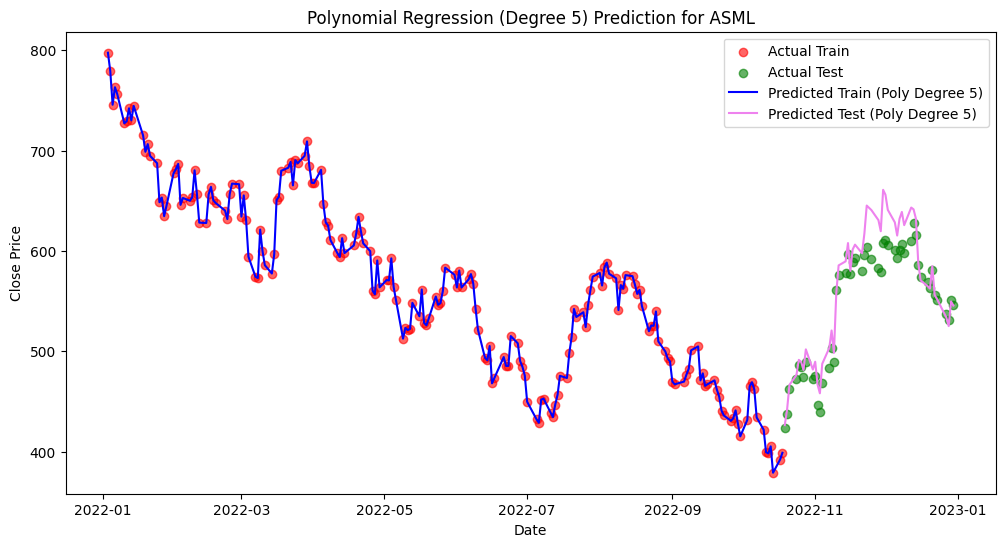

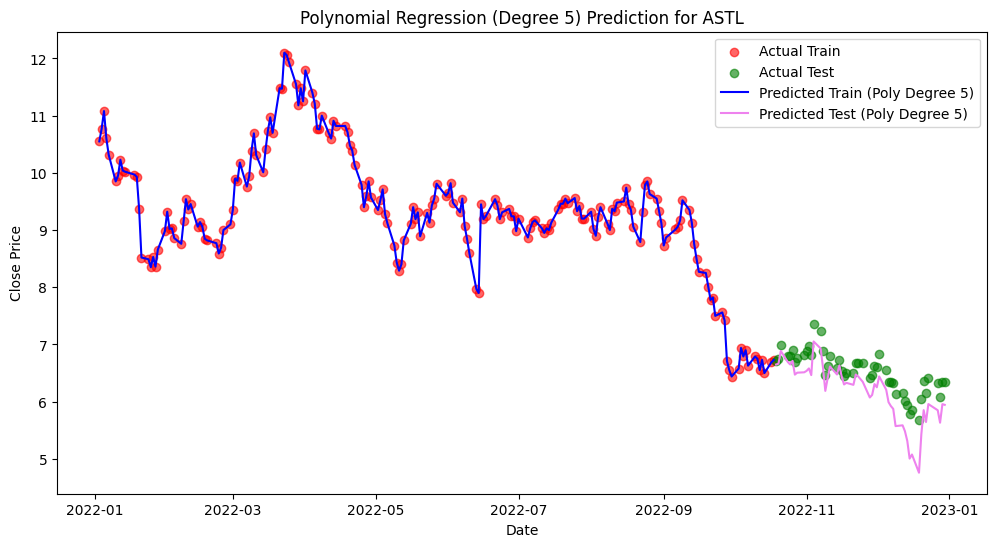

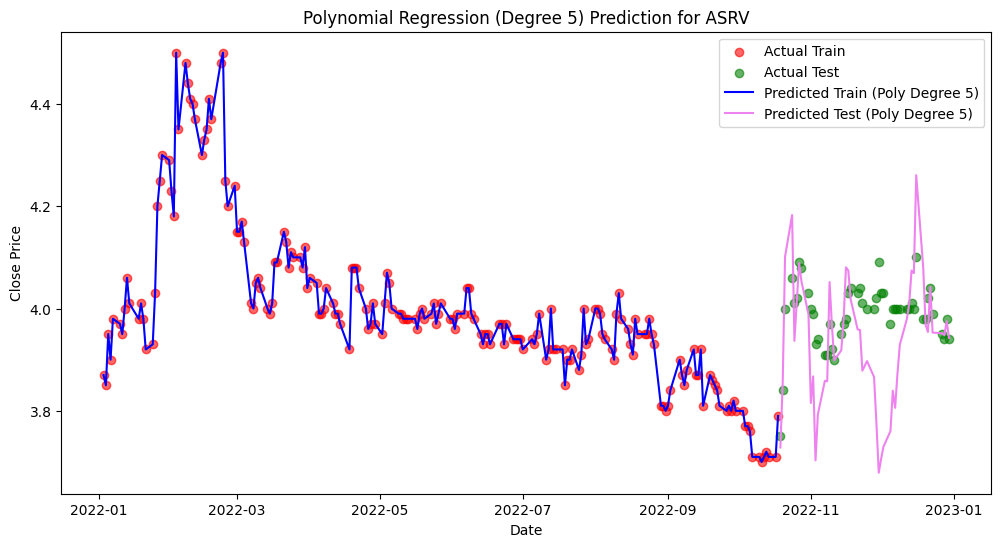

Evaluation Results for ASML:
  Degree 1:
    Train RMSE: 0.7020
    Test RMSE: 2.4659
    Train MAE: 0.5329
    Test MAE: 2.1579
    Train R2: 0.9999
    Test R2: 0.9982
  Degree 2:
    Train RMSE: 0.2202
    Test RMSE: 5.8476
    Train MAE: 0.1353
    Test MAE: 4.6275
    Train R2: 1.0000
    Test R2: 0.9897
  Degree 3:
    Train RMSE: 0.0000
    Test RMSE: 29.7993
    Train MAE: 0.0000
    Test MAE: 23.6733
    Train R2: 1.0000
    Test R2: 0.7329
  Degree 4:
    Train RMSE: 0.0000
    Test RMSE: 20.8093
    Train MAE: 0.0000
    Test MAE: 16.1146
    Train R2: 1.0000
    Test R2: 0.8698
  Degree 5:
    Train RMSE: 0.0000
    Test RMSE: 21.5518
    Train MAE: 0.0000
    Test MAE: 16.0533
    Train R2: 1.0000
    Test R2: 0.8603

--------------------------------------------------

Evaluation Results for ASTL:
  Degree 1:
    Train RMSE: 0.0232
    Test RMSE: 0.0805
    Train MAE: 0.0192
    Test MAE: 0.0707
    Train R2: 0.9996
    Test R2: 0.9471
  Degree 2:
    Train RMSE: 0.0032
  

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


selected_tickers = ['ASML', 'ASTL', 'ASRV']

evaluation_results = {}
mse_train_list = {}
mse_test_list = {}

degrees = range(1, 6)

# Iterate through degrees
for degree in degrees:
    for ticker in selected_tickers:

        ticker_df = df[df['ticker'] == ticker].copy()

        ticker_df = ticker_df.sort_values('date')
        ticker_df.reset_index(drop=True, inplace=True)

        X = ticker_df.drop(['close', 'date', 'ticker'], axis=1)
        y = ticker_df['close']

        split_index = int(len(X) * 0.8)
        X_train = X.iloc[:split_index]
        X_test = X.iloc[split_index:]
        y_train = y.iloc[:split_index]
        y_test = y.iloc[split_index:]
        polynomial = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = polynomial.fit_transform(X_train)
        X_test_poly = polynomial.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        if ticker not in evaluation_results:
            evaluation_results[ticker] = {}
        evaluation_results[ticker][f"Degree {degree}"] = {
            "Train RMSE": train_rmse,
            "Test RMSE": test_rmse,
            "Train MAE": train_mae,
            "Test MAE": test_mae,
            "Train R2": train_r2,
            "Test R2": test_r2
        }


        plt.figure(figsize=(12, 6))
        plt.scatter(ticker_df['date'].iloc[:split_index], y_train.values, label='Actual Train', color='red', alpha=0.6)
        plt.scatter(ticker_df['date'].iloc[split_index:], y_test.values, label='Actual Test', color='green', alpha=0.6)
        plt.plot(ticker_df['date'].iloc[:split_index], y_train_pred, label=f'Predicted Train (Poly Degree {degree})', color='blue')
        plt.plot(ticker_df['date'].iloc[split_index:], y_test_pred, label=f'Predicted Test (Poly Degree {degree})', color='violet')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.title(f"Polynomial Regression (Degree {degree}) Prediction for {ticker}")
        plt.legend()
        plt.show()


for ticker, metrics_by_degree in evaluation_results.items():
    print(f"Evaluation Results for {ticker}:")
    for degree, metrics in metrics_by_degree.items():
        print(f"  {degree}:")
        for metric_name, value in metrics.items():
            print(f"    {metric_name}: {value:.4f}")
    print("\n" + "-"*50 + "\n")


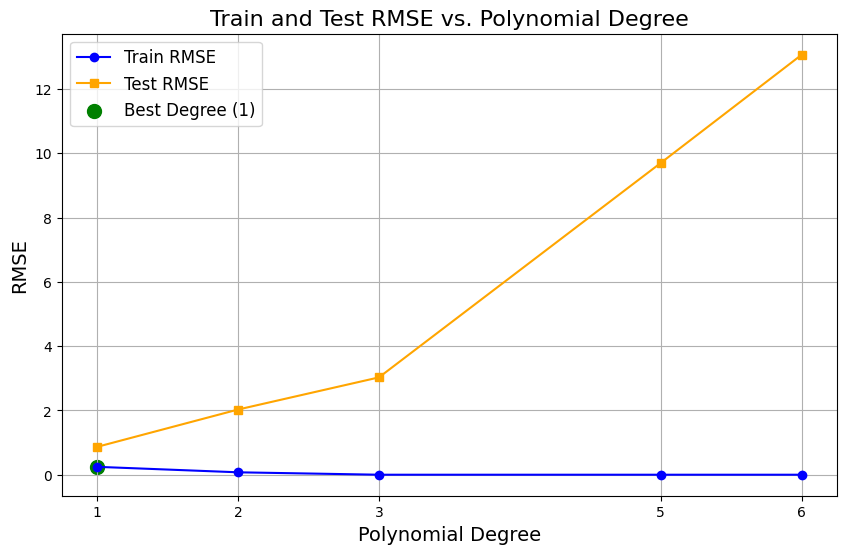

In [24]:
import matplotlib.pyplot as plt


degrees = sorted(avgNum.keys())
train_rmse = [avgNum[degree]['Train RMSE'] for degree in degrees]
test_rmse = [avgNum[degree]['Test RMSE'] for degree in degrees]

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse, marker='o', label='Train RMSE', color='blue')
plt.plot(degrees, test_rmse, marker='s', label='Test RMSE', color='orange')


best_degree = 1
plt.scatter(degrees[0], train_rmse[0], color='green', s=100, label='Best Degree (1)')

plt.title('Train and Test RMSE vs. Polynomial Degree', fontsize=16)
plt.xlabel('Polynomial Degree', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.xticks(degrees)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## Explain tuning results and how we will use it going forward
Through our hyperparameter tuning of our polynomial regression model, we can see that the best degree of polynomial regression for our model is .....

------

The best model is typically the one that:

Minimizes Test RMSE and MAE: Lower values indicate that the model's predictions are closer to the actual values.
Maximizes Test R² Score: A value closer to 1 indicates that the model explains a higher proportion of the variance in the target variable.
Review Evaluation Metrics: Look at the printed evaluation results for all tickers and degrees. Focus on the test metrics rather than the training metrics, as test metrics indicate how well the model generalizes to unseen data.
Compare Across Degrees: For each ticker, compare the test RMSE, MAE, and R² scores across polynomial degrees 1, 2, and 3.
Identify Overfitting or Underfitting:
Overfitting: If a higher-degree model (e.g., degree 3) has significantly better training metrics but worse test metrics, it may be overfitting the training data.
Underfitting: If a lower-degree model (e.g., degree 1) has poor performance on both training and testing data, it may be underfitting.
Select the Optimal Degree: Choose the polynomial degree that provides the best balance between model complexity and predictive performance on the test data.

# New Models: Lasso and Ridge Regression
(might remove decision tree and random forest)

The new models we decided to use are Lasso and Ridge Regression. The reason for this is primarily due to our understanding of what was causing overfitting in our prior polynomial regression models. The first thing we analyzed was the polynomial degree, as higher degrees can cause overfitting for polynomial functions. We recognized quickly that as our polynomial degree increased, our model's issues with overfitting became more severe. We determined that this could be attributed to a lack of regularization, as higher degree polynomials are prone to disproportionately large and oscillating coefficients. We know that while different, both Lasso and Ridge regression add a penalty term based on the magnitute and squared magnitute of the coefficients, respectively. Therefore, we chose to use Lasso and Ridge regression as we required these regularization techniques to deal with the overfitting issues.


Need to Explain why we chose our alpha values (penalty strength) to meet the criteria for hyperparameter tuning

In [42]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Hyperparameters
lasso_alphas = [0.01, 0.08, 0.1, 0.15, 0.2, 0.3, 0.4, 1, 10, 100, 200]
ridge_alphas = [0.01, 0.08, 0.1, 0.15, 0.2, 0.3, 0.4, 1, 10, 100, 200]

lasso_results = {alpha: {'train_rmse': [], 'test_rmse': []} for alpha in lasso_alphas}
ridge_results = {alpha: {'train_rmse': [], 'test_rmse': []} for alpha in ridge_alphas}

for ticker in df['ticker'].unique():

    ticker_df = df[df['ticker'] == ticker].copy()


    ticker_df = ticker_df.sort_values('date')
    ticker_df.reset_index(drop=True, inplace=True)
    X = ticker_df.drop(['close', 'date', 'ticker'], axis=1)
    y = ticker_df['close']

    split_index = int(len(X) * 0.8)
    if split_index == 0:
        split_index = 1

    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    polynomial = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = polynomial.fit_transform(X_train)
    X_test_poly = polynomial.transform(X_test)

    for alpha in lasso_alphas:
        model = Lasso(alpha=alpha, max_iter=10000)
        model.fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        lasso_results[alpha]['train_rmse'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        lasso_results[alpha]['test_rmse'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))


    for alpha in ridge_alphas:
        model = Ridge(alpha=alpha)
        model.fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        ridge_results[alpha]['train_rmse'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        ridge_results[alpha]['test_rmse'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

def calculate_avg_rmse_and_diff(results):
    return {
        alpha: {
            'avg_train_rmse': np.mean(r['train_rmse']),
            'avg_test_rmse': np.mean(r['test_rmse']),
            'percent_difference': 100 * abs(np.mean(r['train_rmse']) - np.mean(r['test_rmse'])) / np.mean(r['train_rmse'])
        }
        for alpha, r in results.items()
    }

average_lasso_results = calculate_avg_rmse_and_diff(lasso_results)
average_ridge_results = calculate_avg_rmse_and_diff(ridge_results)
lasso_df = pd.DataFrame(average_lasso_results).T.rename_axis('alpha').reset_index()
ridge_df = pd.DataFrame(average_ridge_results).T.rename_axis('alpha').reset_index()

print("Lasso Regression Results:")
print(lasso_df)
print("\nRidge Regression Results:")
print(ridge_df)


Lasso Regression Results:
     alpha  avg_train_rmse  avg_test_rmse  percent_difference
0     0.01        0.084044       0.203547          142.191852
1     0.08        0.156786       0.381917          143.591583
2     0.10        0.166614       0.400316          140.265459
3     0.15        0.187331       0.432076          130.649115
4     0.20        0.205722       0.462211          124.677599
5     0.30        0.231175       0.504153          118.083236
6     0.40        0.247994       0.528747          113.209604
7     1.00        0.317992       0.609064           91.534639
8    10.00        0.656279       1.161600           76.997869
9   100.00        1.134538       1.727953           52.304523
10  200.00        1.269680       1.892044           49.017423

Ridge Regression Results:
     alpha  avg_train_rmse  avg_test_rmse  percent_difference
0     0.01        0.029602       0.078534          165.302635
1     0.08        0.039026       0.090765          132.578794
2     0.10       

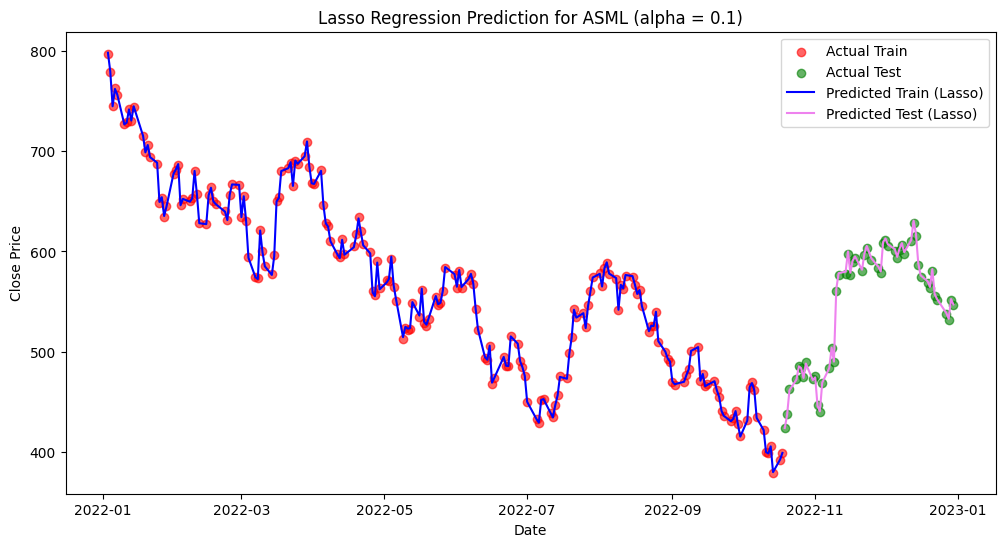

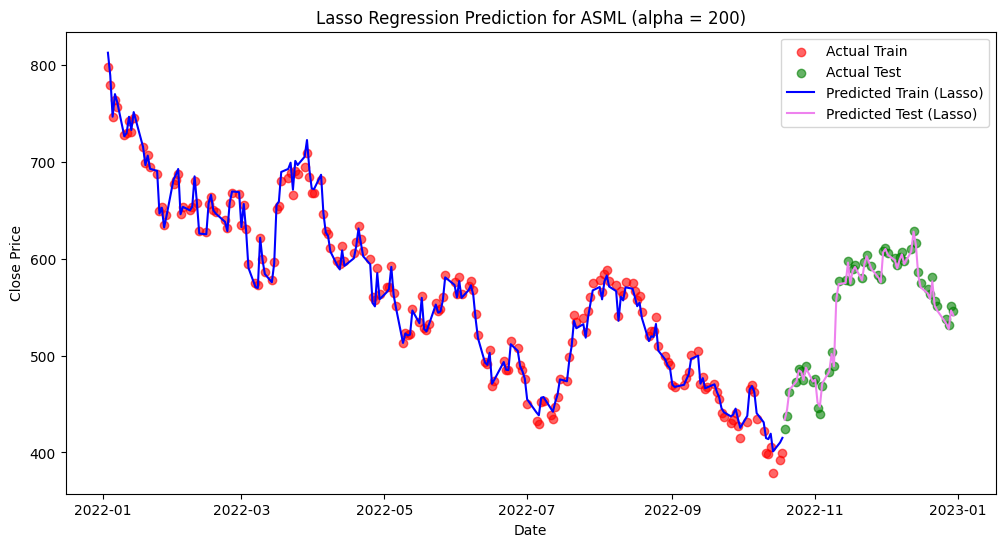

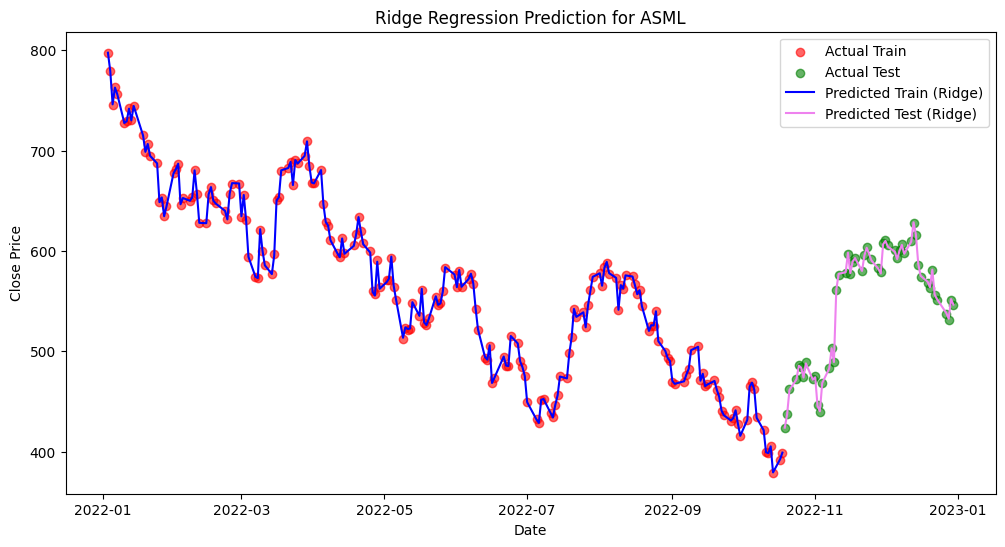

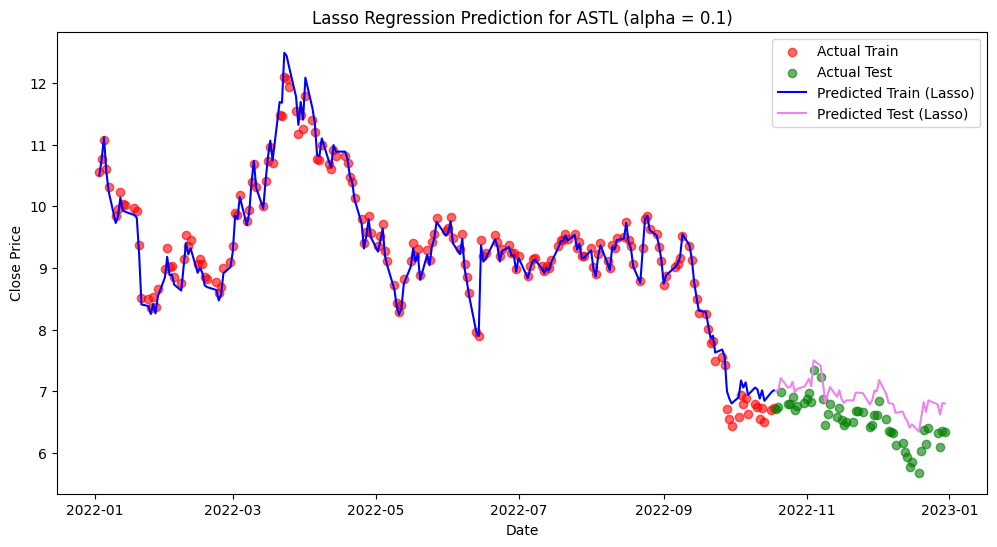

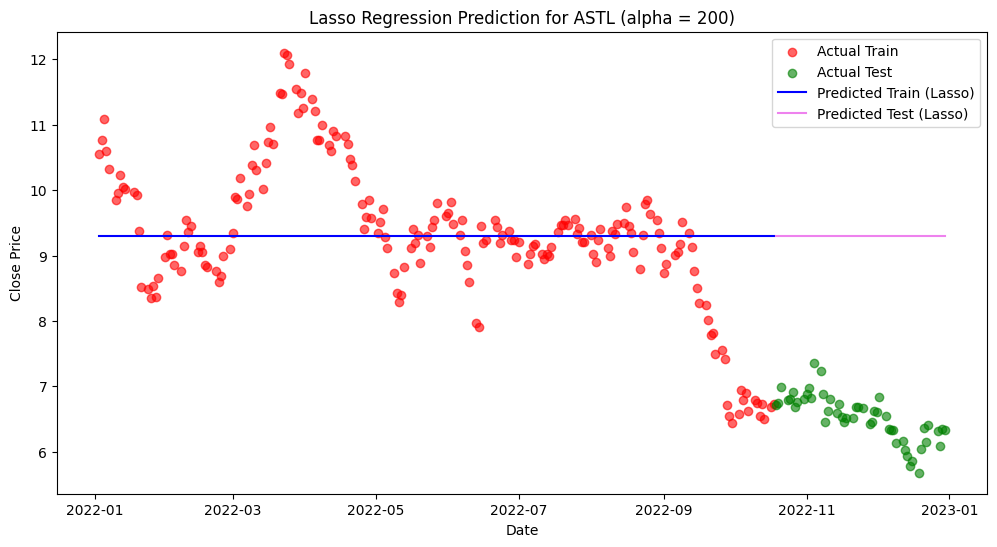

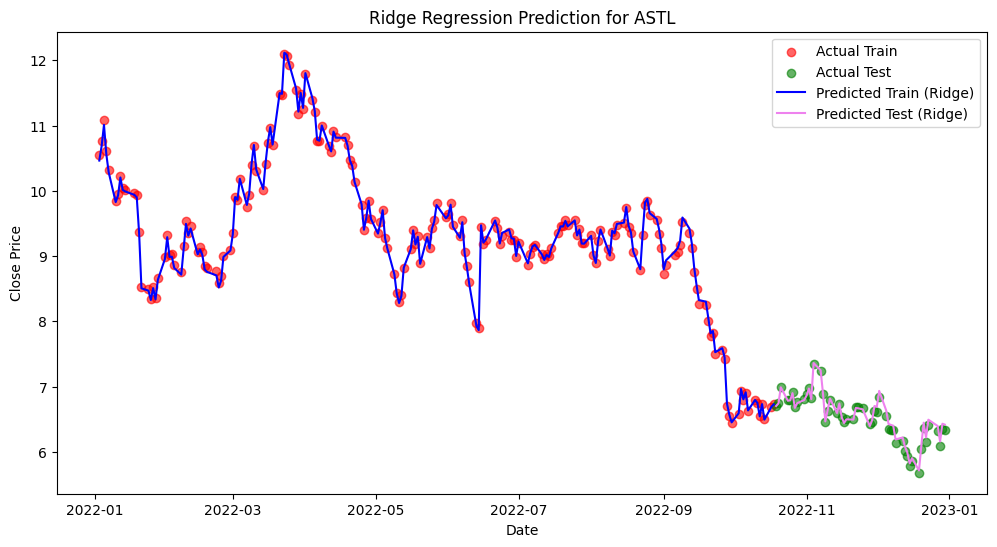

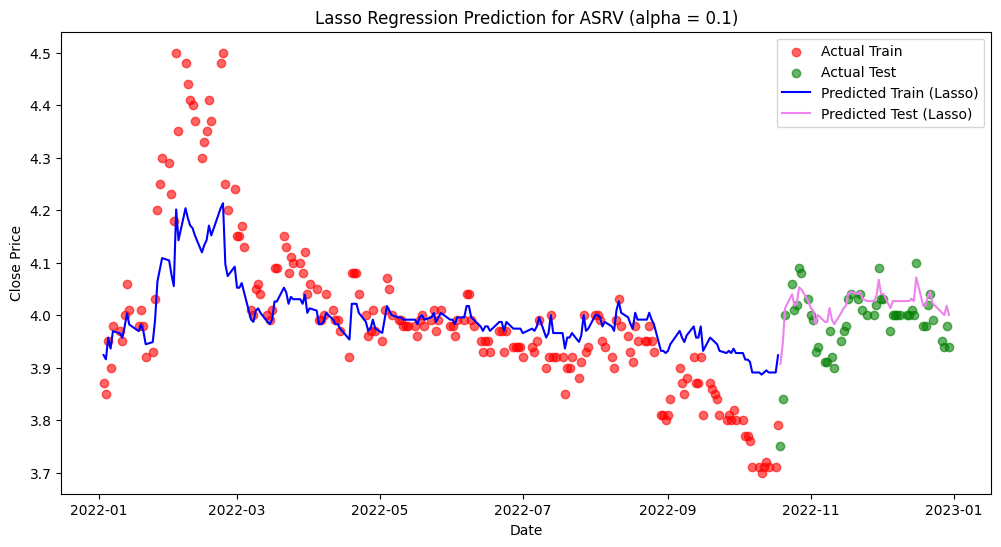

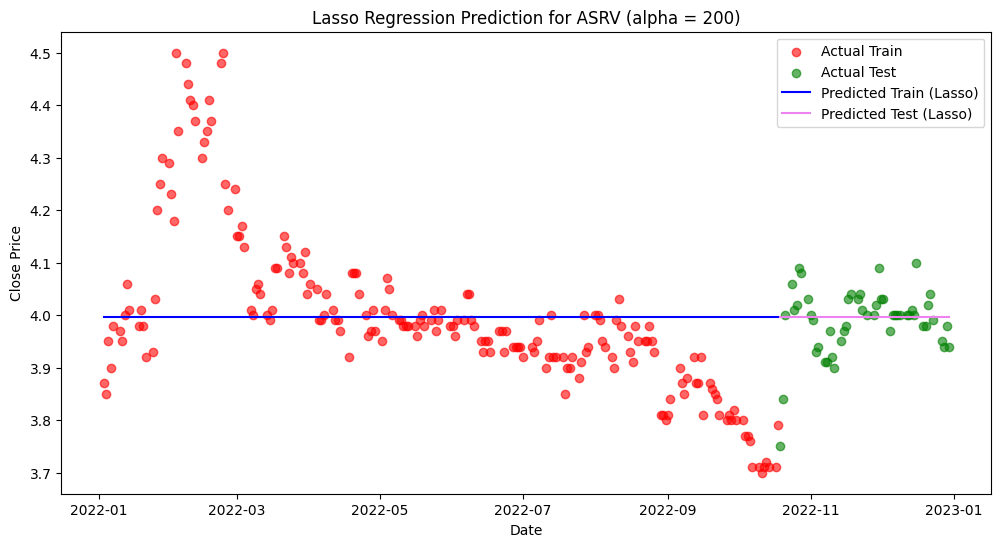

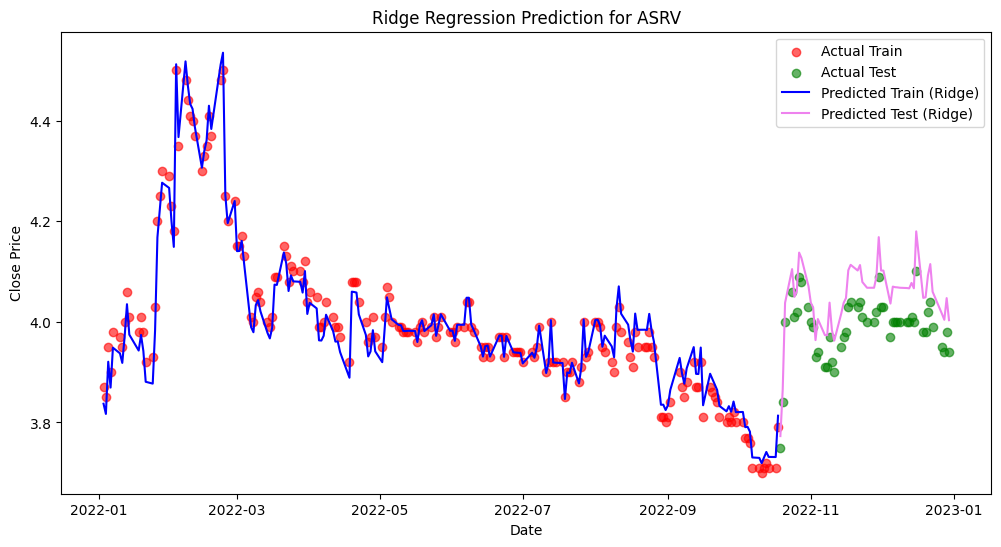

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

selected_tickers = ['ASML', 'ASTL', 'ASRV']


lasso_alpha = 0.1
lasso1_alpha = 200
ridge_alpha = 0.08

evaluation_results = {}
mse_train_list = {}
mse_test_list = {}

# Iterate through tickers for plots
for ticker in selected_tickers:

    ticker_df = df[df['ticker'] == ticker].copy()
    ticker_df = ticker_df.sort_values('date')
    ticker_df.reset_index(drop=True, inplace=True)
    X = ticker_df.drop(['close', 'date', 'ticker'], axis=1)
    y = ticker_df['close']

    split_index = int(len(X) * 0.8)
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    polynomial = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = polynomial.fit_transform(X_train)
    X_test_poly = polynomial.transform(X_test)

    lasso_model = Lasso(alpha=lasso_alpha, max_iter=10000)
    lasso_model.fit(X_train_poly, y_train)
    lasso_model1 = Lasso(alpha=lasso1_alpha, max_iter=10000)
    lasso_model1.fit(X_train_poly, y_train)
    y_train_pred_lasso = lasso_model.predict(X_train_poly)
    y_test_pred_lasso = lasso_model.predict(X_test_poly)
    y_train_pred_lasso1 = lasso_model1.predict(X_train_poly)
    y_test_pred_lasso1 = lasso_model1.predict(X_test_poly)

    ridge_model = Ridge(alpha=ridge_alpha)
    ridge_model.fit(X_train_poly, y_train)
    y_train_pred_ridge = ridge_model.predict(X_train_poly)
    y_test_pred_ridge = ridge_model.predict(X_test_poly)


    # Lasso Alpha 0.1
    plt.figure(figsize=(12, 6))
    plt.scatter(ticker_df['date'].iloc[:split_index], y_train.values, label='Actual Train', color='red', alpha=0.6)
    plt.scatter(ticker_df['date'].iloc[split_index:], y_test.values, label='Actual Test', color='green', alpha=0.6)
    plt.plot(ticker_df['date'].iloc[:split_index], y_train_pred_lasso, label='Predicted Train (Lasso)', color='blue')
    plt.plot(ticker_df['date'].iloc[split_index:], y_test_pred_lasso, label='Predicted Test (Lasso)', color='violet')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f"Lasso Regression Prediction for {ticker} (alpha = 0.1)")
    plt.legend()
    plt.show()


    # Lasso Alpha 200
    plt.figure(figsize=(12, 6))
    plt.scatter(ticker_df['date'].iloc[:split_index], y_train.values, label='Actual Train', color='red', alpha=0.6)
    plt.scatter(ticker_df['date'].iloc[split_index:], y_test.values, label='Actual Test', color='green', alpha=0.6)
    plt.plot(ticker_df['date'].iloc[:split_index], y_train_pred_lasso1, label='Predicted Train (Lasso)', color='blue')
    plt.plot(ticker_df['date'].iloc[split_index:], y_test_pred_lasso1, label='Predicted Test (Lasso)', color='violet')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f"Lasso Regression Prediction for {ticker} (alpha = 200)")
    plt.legend()
    plt.show()

    # Ridge
    plt.figure(figsize=(12, 6))
    plt.scatter(ticker_df['date'].iloc[:split_index], y_train.values, label='Actual Train', color='red', alpha=0.6)
    plt.scatter(ticker_df['date'].iloc[split_index:], y_test.values, label='Actual Test', color='green', alpha=0.6)
    plt.plot(ticker_df['date'].iloc[:split_index], y_train_pred_ridge, label='Predicted Train (Ridge)', color='blue')
    plt.plot(ticker_df['date'].iloc[split_index:], y_test_pred_ridge, label='Predicted Test (Ridge)', color='violet')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f"Ridge Regression Prediction for {ticker}")
    plt.legend()
    plt.show()

for ticker, metrics in evaluation_results.items():
    print(f"Evaluation Results for {ticker}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print("\n" + "-"*50 + "\n")

Here, we have used both Lasso and Ridge regression to make our 'close' price predictions. We focused on hyperparameter tuning for both models, carefully evaluating results based on many different alpha values, which controls regularization strength.

As we can see for Lasso regression, the difference in train and test RMSE goes down as we increase the regularization strength indicating reduced overfitting. However, this is at the cost of the model's ability to generalize and make accurate predictions for test data. The alpha value range with the best balance between overfitting and low test RMSE appears to be between 0.08 and 1.0, depending on which metric you value more. Given the copmlexity of our dataset, some degree of overfitting is not unexpected so we would choose to prioritize low test RMSE and lean towards an alpha value on the lower end of that range.

For Ridge regression, we see low correlation between an increased the alpha value and decreased overfitting. This could be because Ridge regression is less sensitive to changes in the regularization strength since it rarely sets coefficients to 0 like Lasso regression. Again, given the complexity of our dataset, some small degree of overfitting isn't expected, and we find the best balance between overfitting and low RMSE to be around .08 where we see a noticeable improvement in overfitting from 0.01, with a reasonably low test RMSE that is still well under 0.1.

We can observe these trends in the figures below:

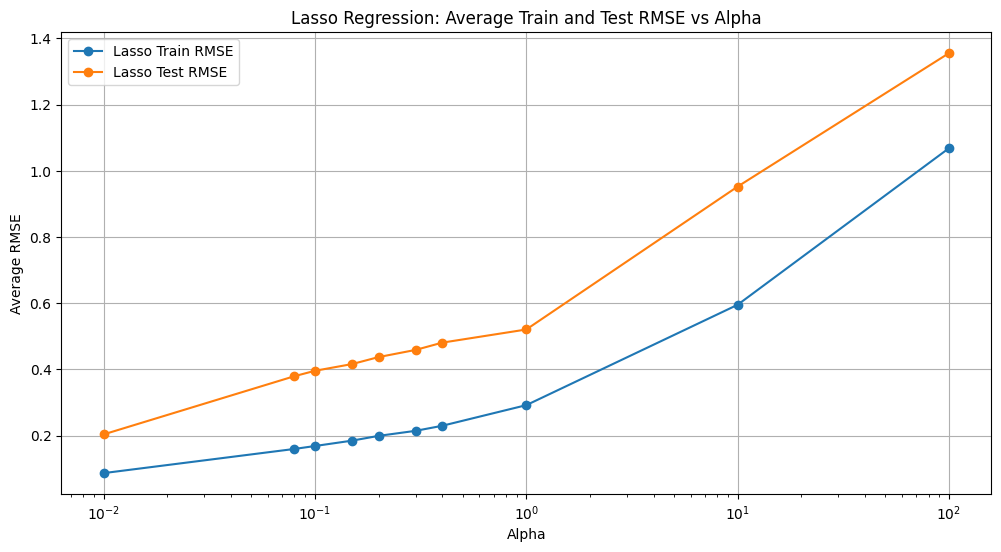

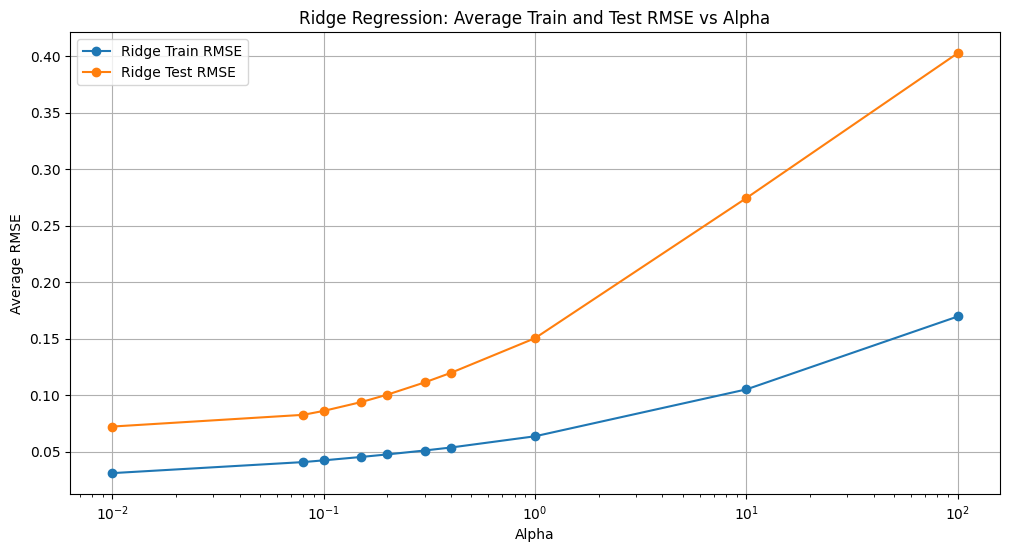

In [27]:
import matplotlib.pyplot as plt

# Lasso
plt.figure(figsize=(12, 6))
plt.plot(lasso_df['alpha'], lasso_df['avg_train_rmse'], label='Lasso Train RMSE', marker='o')
plt.plot(lasso_df['alpha'], lasso_df['avg_test_rmse'], label='Lasso Test RMSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Average RMSE')
plt.title('Lasso Regression: Average Train and Test RMSE vs Alpha')
plt.legend()
plt.grid(True)
plt.show()

# Ridge
plt.figure(figsize=(12, 6))
plt.plot(ridge_df['alpha'], ridge_df['avg_train_rmse'], label='Ridge Train RMSE', marker='o')
plt.plot(ridge_df['alpha'], ridge_df['avg_test_rmse'], label='Ridge Test RMSE', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Average RMSE')
plt.title('Ridge Regression: Average Train and Test RMSE vs Alpha')
plt.legend()
plt.grid(True)
plt.show()

# Support Vector Regression

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'gamma': ['scale', 'auto']
}

hyperparameter_results = []

for ticker in df['ticker'].unique():

    ticker_df = df[df['ticker'] == ticker].copy()
    ticker_df = ticker_df.sort_values('date').reset_index(drop=True)

    X = ticker_df.drop(['close', 'date', 'ticker'], axis=1)
    y = ticker_df['close']

    split_index = int(len(X) * 0.8)
    if split_index == 0:
        continue
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    tscv = TimeSeriesSplit(n_splits=5)

    for kernel in param_grid['kernel']:
        for C in param_grid['C']:
            for epsilon in param_grid['epsilon']:
                for gamma in param_grid['gamma']:
                    svr = SVR(kernel=kernel, C=C, epsilon=epsilon, gamma=gamma)

                    try:
                        cv_scores = cross_val_score(svr, X_train_scaled, y_train, cv=tscv, scoring='r2')
                        svr.fit(X_train_scaled, y_train)

                        y_train_pred = svr.predict(X_train_scaled)
                        y_test_pred = svr.predict(X_test_scaled)
                        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
                        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                        train_r2 = r2_score(y_train, y_train_pred)
                        test_r2 = r2_score(y_test, y_test_pred)
                        cv_mean_r2 = np.mean(cv_scores)

                        hyperparameter_results.append({
                            'kernel': kernel,
                            'C': C,
                            'epsilon': epsilon,
                            'gamma': gamma,
                            'train_rmse': train_rmse,
                            'test_rmse': test_rmse,
                            'train_r2': train_r2,
                            'test_r2': test_r2,
                            'cv_mean_r2': cv_mean_r2
                        })
                    except Exception as e:
                        print(f"Error for {kernel}, C={C}, epsilon={epsilon}, gamma={gamma}: {e}")

hyperparameter_df = pd.DataFrame(hyperparameter_results)

average_results = (
    hyperparameter_df.groupby(['kernel', 'C', 'epsilon', 'gamma'])
    .mean()[['train_rmse', 'test_rmse', 'train_r2', 'test_r2', 'cv_mean_r2']]
    .reset_index()
)

print("Average SVR Results Across All Tickers for Each Hyperparameter Combination:")
print(average_results)

average_results.to_csv("svr_average_hyperparameter_results.csv", index=False)


Average SVR Results Across All Tickers for Each Hyperparameter Combination:
    kernel      C  epsilon  gamma  train_rmse  test_rmse  train_r2    test_r2  \
0   linear    0.1     0.01   auto    1.466738   1.205521  0.992275   0.950227   
1   linear    0.1     0.01  scale    1.466738   1.205521  0.992275   0.950227   
2   linear    0.1     0.10   auto    1.501897   1.261675  0.948063   0.281060   
3   linear    0.1     0.10  scale    1.501897   1.261675  0.948063   0.281060   
4   linear    0.1     1.00   auto    1.831344   1.761385  0.243474 -71.824187   
..     ...    ...      ...    ...         ...        ...       ...        ...   
67     rbf  100.0     0.01  scale    0.178257   1.155685  0.999141  -1.115192   
68     rbf  100.0     0.10   auto    0.227865   1.293672  0.952132  -2.056317   
69     rbf  100.0     0.10  scale    0.227865   1.293672  0.952132  -2.056317   
70     rbf  100.0     1.00   auto    0.635139   1.731747  0.239183 -77.887413   
71     rbf  100.0     1.00  scale

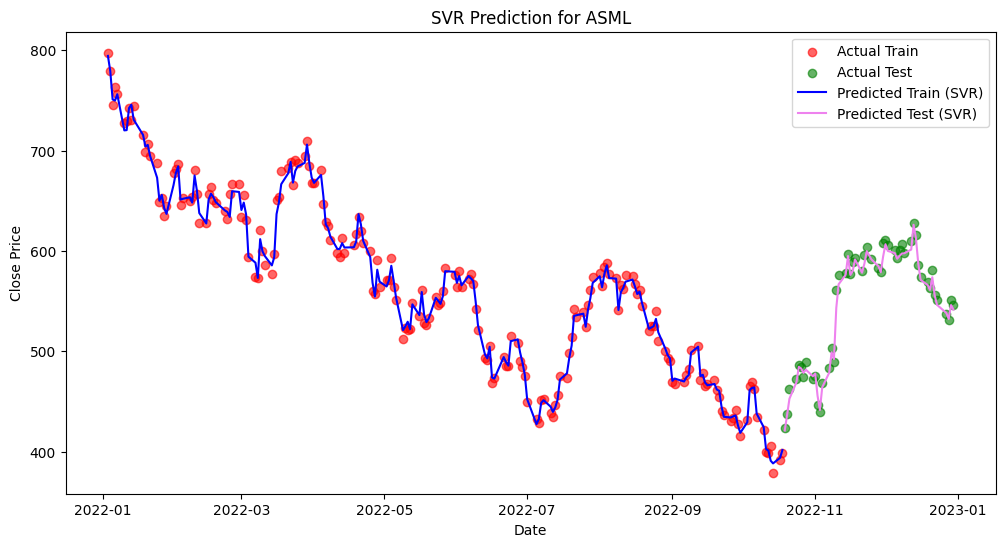

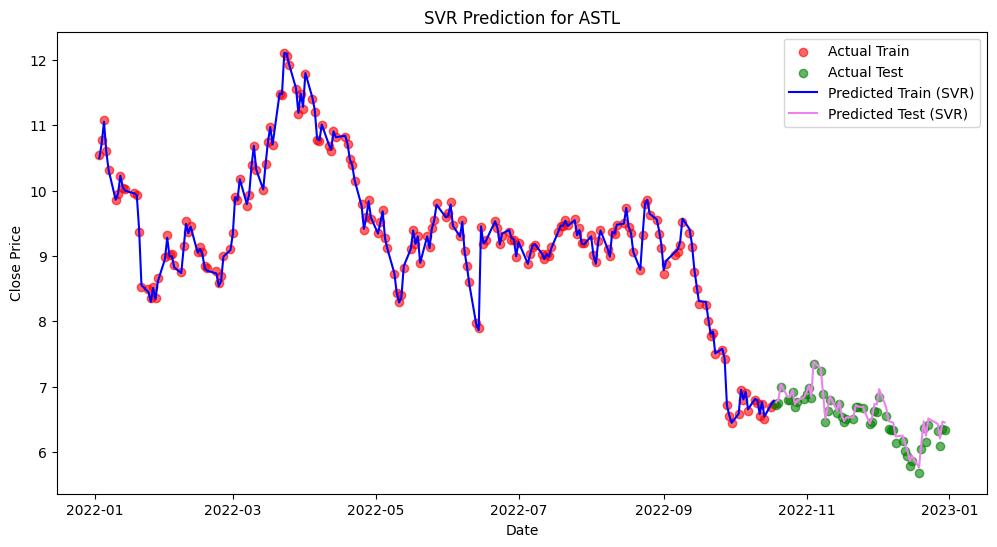

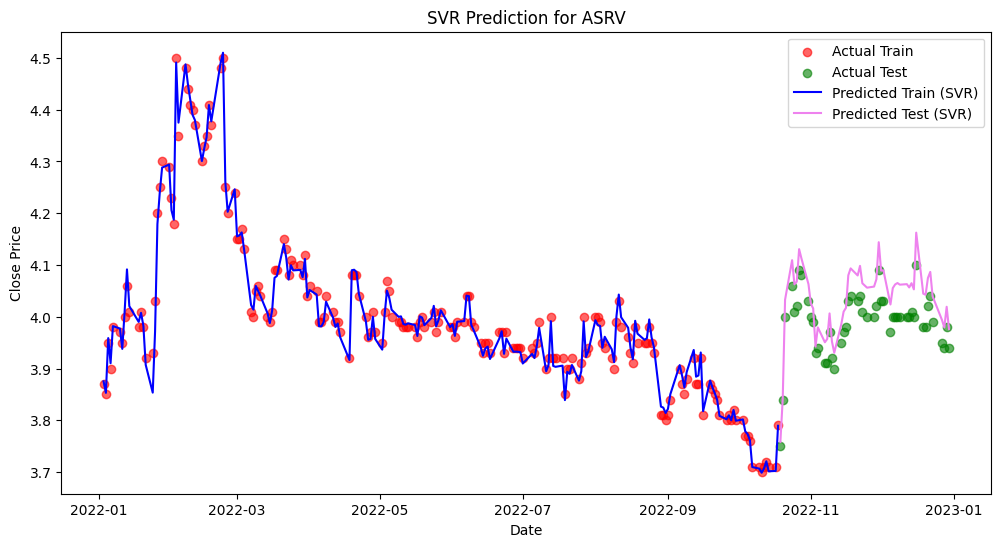

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


selected_tickers = ['ASML', 'ASTL', 'ASRV']
svr_params = {'kernel': 'linear', 'C': 1.0, 'epsilon': 0.01, 'gamma': 'auto'}

evaluation_results = {}
mse_train_list = {}
mse_test_list = {}

# Iterate Over Each Ticker
for ticker in selected_tickers:

    ticker_df = df[df['ticker'] == ticker].copy()
    ticker_df = ticker_df.sort_values('date')
    ticker_df.reset_index(drop=True, inplace=True)

    X = ticker_df.drop(['close', 'date', 'ticker'], axis=1)
    y = ticker_df['close']

    split_index = int(len(X) * 0.8)
    X_train = X.iloc[:split_index]
    X_test = X.iloc[split_index:]
    y_train = y.iloc[:split_index]
    y_test = y.iloc[split_index:]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    svr_model = SVR(**svr_params)
    svr_model.fit(X_train_scaled, y_train)
    y_train_pred_svr = svr_model.predict(X_train_scaled)
    y_test_pred_svr = svr_model.predict(X_test_scaled)
    test_date_range = ticker_df['date'].iloc[split_index:split_index + len(y_test_pred_svr)]

    plt.figure(figsize=(12, 6))
    plt.scatter(ticker_df['date'].iloc[:split_index], y_train.values, label='Actual Train', color='red', alpha=0.6)
    plt.scatter(ticker_df['date'].iloc[split_index:], y_test.values, label='Actual Test', color='green', alpha=0.6)
    plt.plot(ticker_df['date'].iloc[:split_index], y_train_pred_svr, label='Predicted Train (SVR)', color='blue')
    plt.plot(test_date_range, y_test_pred_svr, label='Predicted Test (SVR)', color='violet')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f"SVR Prediction for {ticker}")
    plt.legend()
    plt.show()

for ticker, metrics in evaluation_results.items():
    print(f"Evaluation Results for {ticker}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print("\n" + "-"*50 + "\n")

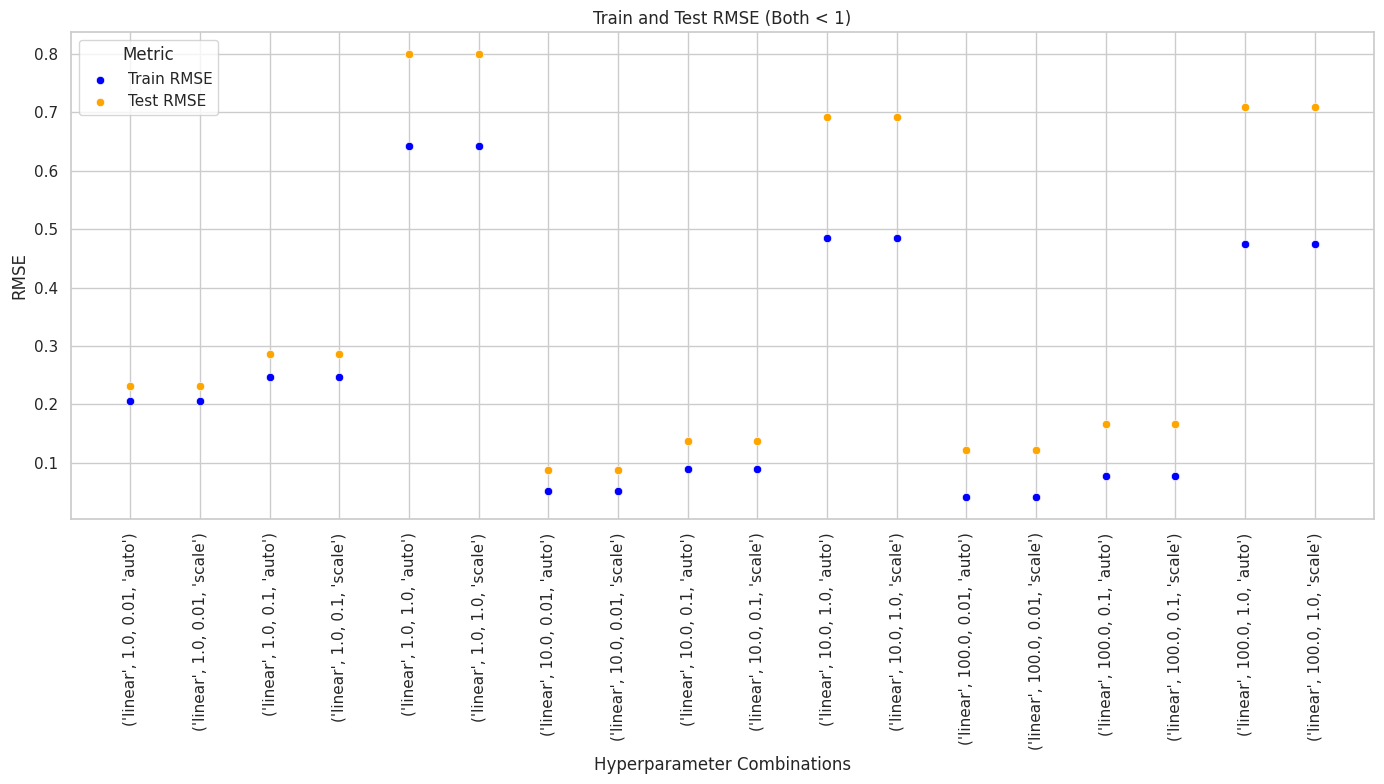

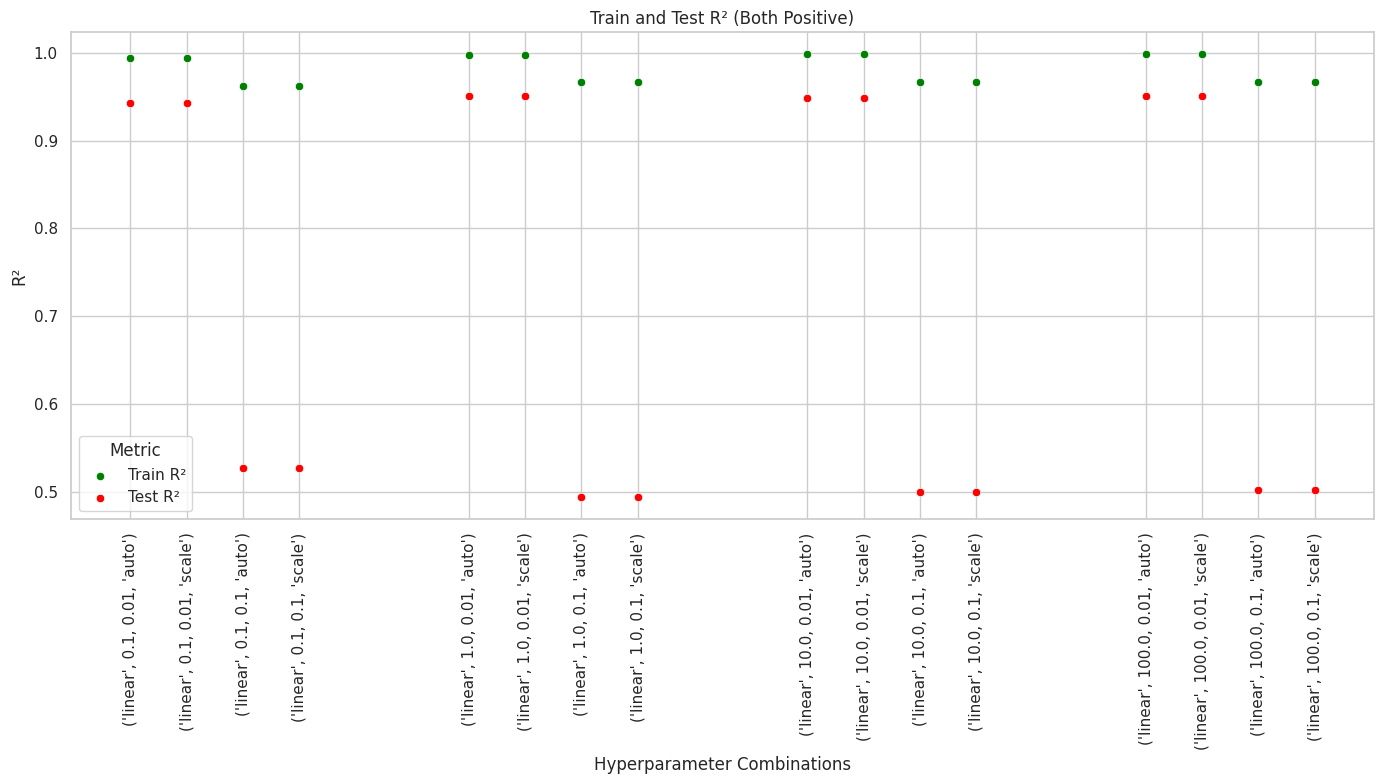

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
rmse_filtered = average_results[
    (average_results['train_rmse'] < 1) & (average_results['test_rmse'] < 1)
]

plt.figure(figsize=(14, 8))
sns.scatterplot(
    x=rmse_filtered.index,
    y=rmse_filtered['train_rmse'],
    label='Train RMSE',
    color='blue',
    marker='o'
)
sns.scatterplot(
    x=rmse_filtered.index,
    y=rmse_filtered['test_rmse'],
    label='Test RMSE',
    color='orange',
    marker='o'
)
plt.xticks(
    rmse_filtered.index,
    rmse_filtered[['kernel', 'C', 'epsilon', 'gamma']].apply(tuple, axis=1),
    rotation=90
)
plt.xlabel("Hyperparameter Combinations")
plt.ylabel("RMSE")
plt.title("Train and Test RMSE (Both < 1)")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

r2_filtered = average_results[
    (average_results['train_r2'] > 0) & (average_results['test_r2'] > 0)
]


plt.figure(figsize=(14, 8))
sns.scatterplot(
    x=r2_filtered.index,
    y=r2_filtered['train_r2'],
    label='Train R²',
    color='green',
    marker='o'
)
sns.scatterplot(
    x=r2_filtered.index,
    y=r2_filtered['test_r2'],
    label='Test R²',
    color='red',
    marker='o'
)
plt.xticks(
    r2_filtered.index,
    r2_filtered[['kernel', 'C', 'epsilon', 'gamma']].apply(tuple, axis=1),
    rotation=90
)
plt.xlabel("Hyperparameter Combinations")
plt.ylabel("R²")
plt.title("Train and Test R² (Both Positive)")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


Here you can see the comparisons between hyper-parameter combinations for SVR showing RMSE and R-squared for Kernel, C, Epsilon, and Gamma respectively. This only shows RMSE values below 1, and R-squared values that are positive, to ensure that we are only showing hyper-parameter combinations were considering as effective settings for our model.